<a href="https://colab.research.google.com/github/AngieS23/labs_machine_learning/blob/main/lab1_exploratory_data_analysis%5CLaboratorio_1ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio #1**

### Estudiantes:
+ Luis David Solano Santamaría - C17634
+ Angie Solís Manzano - C17686

## Configuración del ambiente

In [2]:
!pip install dash
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.7 MB/s eta 0:00:00


In [3]:
# Bibliotecas a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from dash import Dash, dcc, html, Input, Output
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis

## 1. Cargar conjunto de datos

Para este laboratorio, se trabajará con un conjunto de datos de cáncer de próstata [1].

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Lectura de datos desde Google Drive
!ls "/content/drive/My Drive/Colab Notebooks/prad_mich_clinical_data.tsv"
original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/prad_mich_clinical_data.tsv', sep='\t')

Mounted at /content/drive
'/content/drive/My Drive/Colab Notebooks/prad_mich_clinical_data.tsv'


In [4]:
# Lectura de datos desde la sesión
# original = pd.read_csv("prad_mich_clinical_data.tsv", sep='\t')

# Lectura de datos desde GitHub
original = pd.read_csv("https://raw.githubusercontent.com/AngieS23/labs_machine_learning/refs/heads/main/lab1_exploratory_data_analysis/prad_mich_clinical_data.tsv", sep='\t')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## 2. Exploración inicial de datos

In [ ]:
original.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Oncotree Code,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
0,prad_mich,T1,T1,NaN,Prostate Cancer,Prostate Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,prad_mich,T10,T10,NaN,Prostate Cancer,Prostate Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,prad_mich,T11,T11,NaN,Prostate Cancer,Prostate Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,prad_mich,T12,T12,62.0,Prostate Cancer,Prostate Adenocarcinoma,ERG+,0.1277,8.0,Yes,23.0,Prostate,PRAD,NaN,0:LIVING,Prostate,1,Primary,5.3,Male,Matched,NaN,NaN,0.766667,NaN,NaN,NaN,NaN,NaN
4,prad_mich,T17,T17,NaN,Prostate Cancer,Prostate Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,PRAD,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como se puede observar, el conjunto de datos cuenta con diversos atributos. Sin embargo, hay varios de ellos que tienen datos técnicos que para este estudio no son de interés por lo que serán eliminados.


Asimismo, también es necesario cambiar el formato de algunos valores para poder manejarlos más cómodamente.

In [ ]:
original.drop(columns=['Study ID', 'Patient ID', 'Sample ID', 'Oncotree Code', 'Cancer Type', 'Cancer Type Detailed'], inplace=True)

original.replace(to_replace='0:LIVING', value='Living', inplace=True)
original.replace(to_replace='1:DECEASED', value='Deceased', inplace=True)

In [ ]:
# Clasificación de atributos
atributosNumericos = ['Fraction Genome Altered', 'Radical Prostatectomy Gleason Score for Prostate Cancer', 'Mutation Count', 'Number of Samples Per Patient',
                      'Serum PSA', 'Survival from First Chemotherapy', 'Survival from First Hormone Therapy', 'TMB (nonsynonymous)']
atributosCategoricos = ['ETS RAF-SPINK1 Status', 'Matched GE ACGH', 'Normal location', 'Overall Survival Status', 'Primary Tumor Site',
                        'Sample Type', 'Sex', 'Somatic Status', 'Chemotherapy', 'Hormone Therapy', 'Palliative Radiation', 'Prostatectomy', 'Radiation']

In [ ]:
original.head()

,Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62.0,ERG+,0.1277,8.0,Yes,23.0,Prostate,NaN,Living,Prostate,1,Primary,5.3,Male,Matched,NaN,NaN,0.766667,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
original.tail()

,Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
116,76.0,No ETS,0.1104,NaN,No,34.0,Spleen,141.0,Deceased,Lung,1,Metastasis,82.0,Male,Unmatched,39.0,141.0,1.133333,Yes,Yes,Yes,No,No
117,59.0,No ETS,0.5352,NaN,No,31.0,Liver,94.0,Deceased,Iliac lymph node,1,Metastasis,1678.0,Male,Unmatched,12.0,94.0,1.033333,Yes,Yes,Yes,No,No
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,62.0,ERG+,0.6960,NaN,No,27.0,Liver,129.0,Deceased,Paratracheal lymph node,1,Metastasis,658.0,Male,Unmatched,32.0,129.0,0.900000,Yes,Yes,No,No,No
120,66.0,No ETS,0.6947,NaN,Yes,38.0,Pancreas,64.0,Deceased,Soft tissue,1,Metastasis,8083.0,Male,Matched,19.0,48.0,1.266667,Yes,Yes,No,No,No


In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Diagnosis Age                                            61 non-null     float64
 1   ETS RAF-SPINK1 Status                                    61 non-null     object 
 2   Fraction Genome Altered                                  61 non-null     float64
 3   Radical Prostatectomy Gleason Score for Prostate Cancer  11 non-null     float64
 4   Matched GE ACGH                                          61 non-null     object 
 5   Mutation Count                                           61 non-null     float64
 6   Normal location                                          61 non-null     object 
 7   Overall Survival (Months)                                50 non-null     float64
 8   Overall Survival Status       

Lo primero que se puede notar de este conjunto de datos es que hay muchos valores nulos. Todos los atributos tienen valores nulos, exceptuando *Number of Samples Per Patient*.

Lo siguiente que queda evidenciado es que hay muchos atributos desconocidos. Entonces a continuación se realiza una descripción breve de los atributos que requieren conocimiento médico:
1. *ETS RAF-SPINK1 Status*: fusiones en los genes asociadas al desarrollo de cáncer de próstata [2].
1. *Fraction Genome Altered*: indica el número de copias que el alterado en el genoma. Se calcula dividiendo la fracción del log2 del número de copias variadas entre el tamaño del genoma [3].
1. *Radical Prostatectomy Gleason Score for Prostate Cancer*: es el predictor de supervivencia más importante. Se calcula sumando los valores de los dos contingentes más representados en la muestra [4]. Un valor menor a 6 usualmente indica un cáncer indulgente. Sin embargo, un valor mayor o igual a 8 está asociado con tumores diferenciado y un mal pronóstico [5].
1. *Matched GE ACGH*: es el resultado de comparar el genoma del paciente con la hibridación genómica comparativa de arreglos (aCGH) [6].
1. *Serum PSA*: mida la cantidad de el antígeno específico de la próstata (PSA) en la sangre. Un valor elevado puede deberse a cáncer de próstata [7].
1. *TMB (nonsynonymous)*: es el número de mutaciones somáticas por megabase de secuencia genómica examinada. Por ser *nonsynonymous* indica que entre mayor sea su valor, mayor es la respuesta clínica [8].

In [ ]:
original.describe()

,Diagnosis Age,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Serum PSA,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous)
count,61.000000,61.000000,11.000000,61.000000,50.000000,121.000000,58.000000,49.000000,50.000000,61.000000
mean,68.327869,0.388449,8.272727,62.278689,97.260000,1.049587,927.634483,36.591837,75.300000,2.080874
std,8.574616,0.201023,0.786245,94.012434,51.583422,0.312283,1693.488561,31.292916,39.091337,3.139406
min,52.000000,0.015300,7.000000,13.000000,14.000000,1.000000,0.000000,0.000000,7.000000,0.466667
25%,62.000000,0.221100,8.000000,33.000000,54.500000,1.000000,24.025000,14.000000,45.000000,1.100000
50%,70.000000,0.422000,8.000000,40.000000,96.000000,1.000000,250.500000,30.000000,74.500000,1.333333
75%,76.000000,0.535200,9.000000,61.000000,132.750000,1.000000,895.750000,44.000000,102.750000,2.033333
max,85.000000,0.834000,9.000000,730.000000,218.000000,3.000000,8083.000000,123.000000,179.000000,24.400000


De los resultados obtenido del análisis de las variables numéricas se pueden realizar varias observaciones. En general, se puede observar que la mayoría de los atributos tienen valores nulos que representan casi el 50% del conjunto de datos.

En cuanto a la edad de dignóstico, se puede observar que va de un rango de 52 a 85 años. Asimimo, el promedio es de 68 años y la media de 70 años.

Por otro lado, sobre el *Fraction Genome Altered* se puede observar que los datos se encuentran entre 0.02 y 0.83, con un promedio en 0.39. Es importante recordar que por la forma en la que se calcula este valor, el mayor valor teórico sería 1 indicando que todo el genoma ha sido alterado.

El *Radical Prostatectomy Gleason Score for Prostate Cancer* solo tiene 11 valores no nulos, lo cual es muy bajo en comparación a las 121 entradas del conjunto de datos. También se puede observar que los valores que se tienen se encuentran entre 7 y 9. Es decir, hay tumores diferenciados y los pacientes tienen un mal pronóstico.

En cuanto a la cantidad de mutaciones, se tiene un rango grande de trabajo (desde 13 hasta 730). No obstante, la media es de 62,3. Entonces luego es importante analizar los valores atípicos, especialmente los del rango superior.

La supervivencia general en meses tiene un rango desde los 14 meses (un poco más de un año) hasta 218 (más de 18 años). El promedio se encuentra en los 97 meses; es decir, aproximadamente 8 años.

Sobre el número de muestras por paciente, se puede observar que solo hay dos valores: 1 y 3. La gran mayoría corresponde a 1.

El *Serum PSA* tiene un rango muy grande de valores que van desde 0 hasta 8083. Es importante recordar que entre mayor es el valor, mayor puede ser el cáncer de próstata. Es importante resaltar que la mediana es 250. Así que luego es importante analizar los valores atípicos.

La supervivencia desde la primera quimoterapia tiene valores desde 0 hasta 123. En cambio, la supervivencia desde la primera terapia de hormonas va desde 7 hasta 179. No obstante, se puede observar que ambos valores son muy bajos.

Por último, el TMB tiene valores desde aproximadamente 0 hasta 24. Además, el 75% de los valores se encuentra en 2.03. Así que, la mayoría de pacientes no tuvieron una respuesta clínica. Los que sí la tuvieron, probablemente serán identificados como valores atípicos.

## 3. Manejo de valores nulos

Para los valores atípicos de atributos categóricos, se decidió crear una categoría *Unknown* donde se guardarán los valores desconocidos. Además, los atributos de *Diagnosis Age* y *Overall Survival (Months)* serán tomados como categóricos con el fin de no rellenar los valores desconocidos con otros valores.

In [ ]:
original[atributosCategoricos] = original[atributosCategoricos].fillna('Unknown', inplace=False)

original['Diagnosis Age'] = original['Diagnosis Age'].fillna('Unknown', inplace=False)
original['Overall Survival (Months)'] = original['Overall Survival (Months)'].fillna('Unknown', inplace=False)

A continuación, se va a probar con 3 técnicas distintas para manejar los valores nulos en los atributos numéricos y medir sus tiempos de ejecución respectivos.

### Técnica #1 - Calcular mediana del atributo faltante

In [ ]:
tiempoInicialA1 = datetime.datetime.now()

A1 = original.fillna(original.median(numeric_only=True), inplace=False)

tiempoA1 = datetime.datetime.now() - tiempoInicialA1
tiempoA1.total_seconds()

0.011107

In [ ]:
A1.head()

,Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
0,Unknown,Unknown,0.4220,8.0,Unknown,40.0,Unknown,Unknown,Unknown,Unknown,1,Unknown,250.5,Unknown,Unknown,30.0,74.5,1.333333,Unknown,Unknown,Unknown,Unknown,Unknown
1,Unknown,Unknown,0.4220,8.0,Unknown,40.0,Unknown,Unknown,Unknown,Unknown,1,Unknown,250.5,Unknown,Unknown,30.0,74.5,1.333333,Unknown,Unknown,Unknown,Unknown,Unknown
2,Unknown,Unknown,0.4220,8.0,Unknown,40.0,Unknown,Unknown,Unknown,Unknown,1,Unknown,250.5,Unknown,Unknown,30.0,74.5,1.333333,Unknown,Unknown,Unknown,Unknown,Unknown
3,62.0,ERG+,0.1277,8.0,Yes,23.0,Prostate,Unknown,Living,Prostate,1,Primary,5.3,Male,Matched,30.0,74.5,0.766667,Unknown,Unknown,Unknown,Unknown,Unknown
4,Unknown,Unknown,0.4220,8.0,Unknown,40.0,Unknown,Unknown,Unknown,Unknown,1,Unknown,250.5,Unknown,Unknown,30.0,74.5,1.333333,Unknown,Unknown,Unknown,Unknown,Unknown


### Técnica #2 - Eliminación de atributos

In [ ]:
tiempoInicialA2 = datetime.datetime.now()

# Si el axis es igual a 1 borra las columnas
A2 = original.dropna(inplace=False, axis=1)

tiempoA2 = datetime.datetime.now() - tiempoInicialA2
tiempoA2.total_seconds()

0.188669

In [ ]:
A2.head()

,Diagnosis Age,ETS RAF-SPINK1 Status,Matched GE ACGH,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,62.0,ERG+,Yes,Prostate,Unknown,Living,Prostate,1,Primary,Male,Matched,Unknown,Unknown,Unknown,Unknown,Unknown
4,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


### Técnica #3 - Calcular media del atributo faltante

In [ ]:
tiempoInicialA3 = datetime.datetime.now()

A3 = original.fillna(original.mean(numeric_only=True), inplace=False)

tiempoA3 = datetime.datetime.now() - tiempoInicialA3
tiempoA3.total_seconds()

0.010153

In [ ]:
A3.head()

,Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
0,Unknown,Unknown,0.388449,8.272727,Unknown,62.278689,Unknown,Unknown,Unknown,Unknown,1,Unknown,927.634483,Unknown,Unknown,36.591837,75.3,2.080874,Unknown,Unknown,Unknown,Unknown,Unknown
1,Unknown,Unknown,0.388449,8.272727,Unknown,62.278689,Unknown,Unknown,Unknown,Unknown,1,Unknown,927.634483,Unknown,Unknown,36.591837,75.3,2.080874,Unknown,Unknown,Unknown,Unknown,Unknown
2,Unknown,Unknown,0.388449,8.272727,Unknown,62.278689,Unknown,Unknown,Unknown,Unknown,1,Unknown,927.634483,Unknown,Unknown,36.591837,75.3,2.080874,Unknown,Unknown,Unknown,Unknown,Unknown
3,62.0,ERG+,0.127700,8.000000,Yes,23.000000,Prostate,Unknown,Living,Prostate,1,Primary,5.300000,Male,Matched,36.591837,75.3,0.766667,Unknown,Unknown,Unknown,Unknown,Unknown
4,Unknown,Unknown,0.388449,8.272727,Unknown,62.278689,Unknown,Unknown,Unknown,Unknown,1,Unknown,927.634483,Unknown,Unknown,36.591837,75.3,2.080874,Unknown,Unknown,Unknown,Unknown,Unknown


## 4. Normalización y escalado de datos

Para esta parte se escogió trabajar con el conjunto de datos que se modificó con la Técnica #3 (la media).

### Normalización

In [ ]:
normalizador = MinMaxScaler()
B1 = A3.copy()
B1[atributosNumericos] = normalizador.fit_transform(B1[atributosNumericos])

In [ ]:
B1.describe()

,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Mutation Count,Number of Samples Per Patient,Serum PSA,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous)
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.455783,0.636364,0.068729,0.024793,0.114764,0.297495,0.397093,0.067446
std,0.173623,0.113485,0.092715,0.156141,0.144396,0.160906,0.145231,0.092753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.455783,0.636364,0.037657,0.000000,0.031795,0.297495,0.397093,0.036212
50%,0.455783,0.636364,0.068729,0.000000,0.114764,0.297495,0.397093,0.067446
75%,0.496763,0.636364,0.068729,0.000000,0.114764,0.297495,0.397093,0.067446
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Estandarización

In [ ]:
estandarizador = StandardScaler()
B2 = A3.copy()
B2[atributosNumericos] = estandarizador.fit_transform(B2[atributosNumericos])

In [ ]:
B2.describe()

,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Mutation Count,Number of Samples Per Patient,Serum PSA,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous)
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,1.908483e-16,-1.596296e-14,-5.551115e-17,-1.621751e-16,-7.340318e-18,3.605931e-16,4.404191e-17,-1.192802e-17
std,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,-2.636050e+00,-5.630798e+00,-7.443735e-01,-1.594482e-01,-7.980863e-01,-1.856565e+00,-2.745585e+00,-7.301784e-01
25%,3.921492e-16,-1.571791e-14,-3.365281e-01,-1.594482e-01,-5.769775e-01,3.605091e-16,0.000000e+00,-3.381463e-01
50%,3.921492e-16,-1.571791e-14,0.000000e+00,-1.594482e-01,0.000000e+00,3.605091e-16,0.000000e+00,0.000000e+00
75%,2.370141e-01,-1.571791e-14,0.000000e+00,-1.594482e-01,0.000000e+00,3.605091e-16,0.000000e+00,0.000000e+00
max,3.147519e+00,3.217599e+00,1.008619e+01,6.271629e+00,6.156088e+00,4.384104e+00,4.168625e+00,1.009594e+01


## 5. Codificación de variables categóricas

### Técnica con OneHotEncoder

In [ ]:
codificadorOneHot = OneHotEncoder(sparse_output = False).set_output(transform="pandas")
columnasCodificadas = codificadorOneHot.fit_transform(B1[atributosCategoricos])
C1 = pd.concat([B1, columnasCodificadas],axis=1).drop(columns=atributosCategoricos)

In [ ]:
C1.head()

,Diagnosis Age,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Serum PSA,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),ETS RAF-SPINK1 Status_(ERG+),ETS RAF-SPINK1 Status_ERG+,ETS RAF-SPINK1 Status_ERG+ (small cell),ETS RAF-SPINK1 Status_ETV1+,ETS RAF-SPINK1 Status_No ETS,ETS RAF-SPINK1 Status_RAF1+,ETS RAF-SPINK1 Status_SPINK1+,ETS RAF-SPINK1 Status_Unknown,Matched GE ACGH_No,Matched GE ACGH_Unknown,Matched GE ACGH_Yes,Normal location_Adrenal gland,Normal location_Bone marrow,Normal location_Brain,Normal location_Cerebellum,Normal location_Dura,Normal location_Kidney,Normal location_Liver,Normal location_Lung,Normal location_Pancreas,Normal location_Prostate,Normal location_Soft tissue,Normal location_Spleen,Normal location_Unknown,Overall Survival Status_Deceased,Overall Survival Status_Living,Overall Survival Status_Unknown,Primary Tumor Site_Adrenal,Primary Tumor Site_Adrenal gland,Primary Tumor Site_Bladder,Primary Tumor Site_Bone marrow,Primary Tumor Site_Celiac lymph node,Primary Tumor Site_Diaphragm,Primary Tumor Site_Dura,Primary Tumor Site_Iliac lymph node,Primary Tumor Site_Liver,Primary Tumor Site_Lung,Primary Tumor Site_Lung hilar lymph node,Primary Tumor Site_Lymph node,Primary Tumor Site_Mesentery,Primary Tumor Site_Paratracheal lymph node,Primary Tumor Site_Periaortic lymph node,Primary Tumor Site_Prostate,Primary Tumor Site_Soft tissue,Primary Tumor Site_Subcarinal lymph node,Primary Tumor Site_Supraclavicular lymph node,Primary Tumor Site_Unknown,Sample Type_Metastasis,Sample Type_Primary,Sample Type_Unknown,Sex_Male,Sex_Unknown,Somatic Status_Matched,Somatic Status_Unknown,Somatic Status_Unmatched,Chemotherapy_No,Chemotherapy_Unknown,Chemotherapy_Yes,Hormone Therapy_Unknown,Hormone Therapy_Yes,Palliative Radiation_No,Palliative Radiation_Unknown,Palliative Radiation_Yes,Prostatectomy_No,Prostatectomy_Unknown,Prostatectomy_Yes,Radiation_No,Radiation_Unknown,Radiation_Yes
0,Unknown,0.455783,0.636364,0.068729,Unknown,0.0,0.114764,0.297495,0.397093,0.067446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Unknown,0.455783,0.636364,0.068729,Unknown,0.0,0.114764,0.297495,0.397093,0.067446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Unknown,0.455783,0.636364,0.068729,Unknown,0.0,0.114764,0.297495,0.397093,0.067446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,62.0,0.137291,0.500000,0.013947,Unknown,0.0,0.000656,0.297495,0.397093,0.012535,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Unknown,0.455783,0.636364,0.068729,Unknown,0.0,0.114764,0.297495,0.397093,0.067446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Técnica con LabelEncoder

In [ ]:
codificadorLabel = LabelEncoder()
C2 = B1.copy()

for i in atributosCategoricos:
  C2[i] = codificadorLabel.fit_transform(C2[i])

In [ ]:
C2.head()

,Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
0,Unknown,7,0.455783,0.636364,1,0.068729,12,Unknown,2,19,0.0,2,0.114764,1,1,0.297495,0.397093,0.067446,1,0,1,1,1
1,Unknown,7,0.455783,0.636364,1,0.068729,12,Unknown,2,19,0.0,2,0.114764,1,1,0.297495,0.397093,0.067446,1,0,1,1,1
2,Unknown,7,0.455783,0.636364,1,0.068729,12,Unknown,2,19,0.0,2,0.114764,1,1,0.297495,0.397093,0.067446,1,0,1,1,1
3,62.0,1,0.137291,0.500000,2,0.013947,9,Unknown,1,15,0.0,1,0.000656,0,0,0.297495,0.397093,0.012535,1,0,1,1,1
4,Unknown,7,0.455783,0.636364,1,0.068729,12,Unknown,2,19,0.0,2,0.114764,1,1,0.297495,0.397093,0.067446,1,0,1,1,1


## 6. Detección de valores atípicos

In [ ]:
# Para ciertas visualizaciones se prefieren los valores de las variables categóricas antes de ser codificadas
datosVisualizacion = B1.copy()

### Diagrama *boxplot*

De manera inicial, se va a realizar diagramas *boxplot* para cada variable numérica en el conjunto de datos. Esto con el propósito de visualizar los valores atípicos.

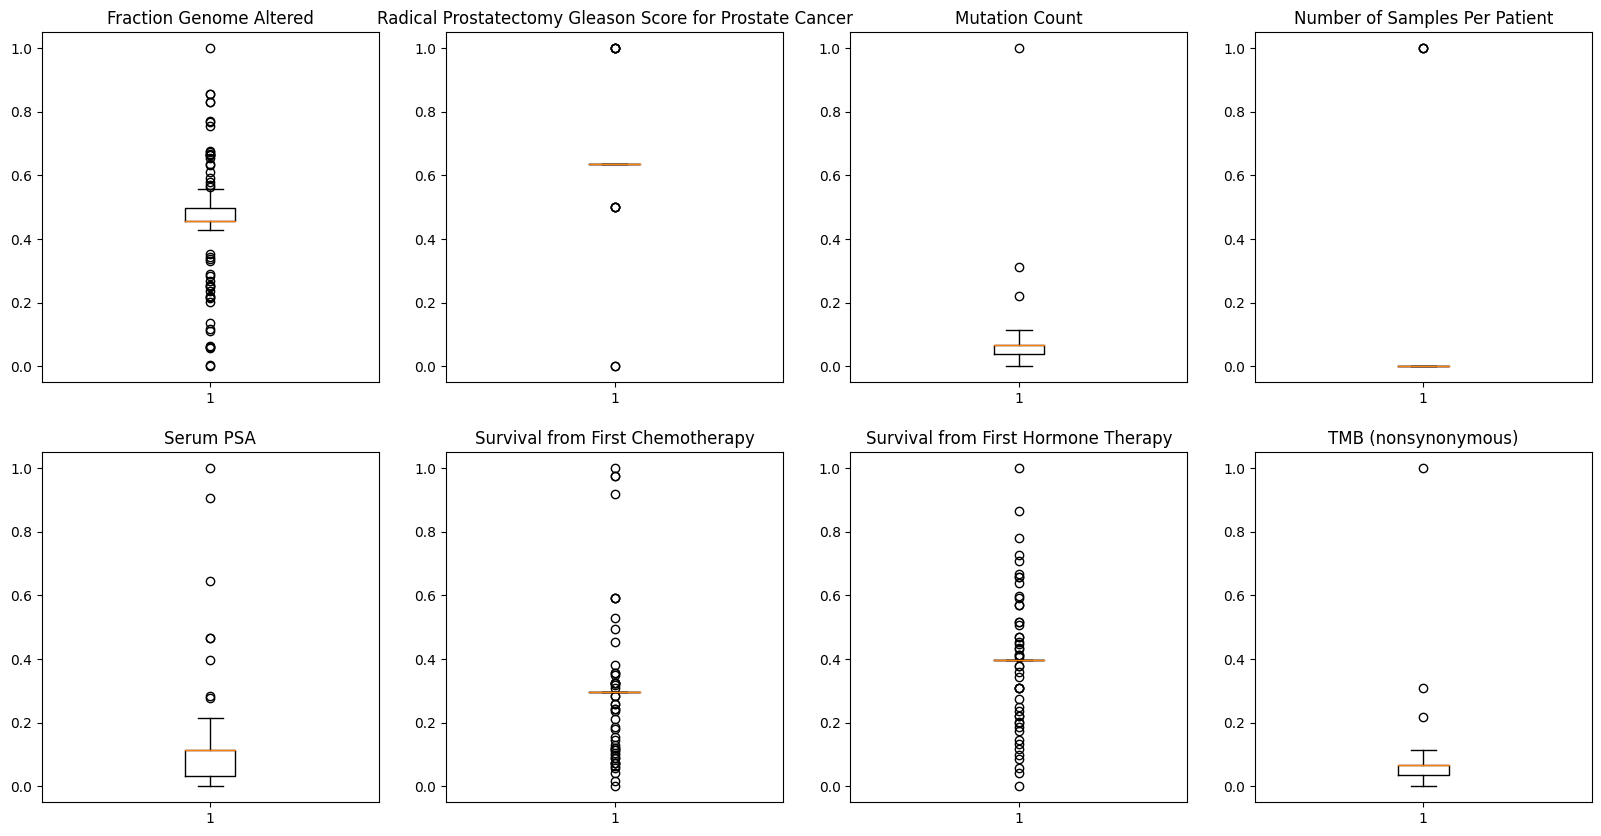

In [ ]:
fig, axis = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(20)

atributoActual = 0
for f in range(0, 2):
  for c in range(0, 4):
    axis[f,c].boxplot(C1[atributosNumericos[atributoActual]])
    axis[f,c].set_title(atributosNumericos[atributoActual])
    atributoActual += 1

plt.show()

Observando los diagramas *boxplot*, parece que todos los atributos tienen valores atípicos. Debido a esto se va a analizar caso por caso si se amerita borrarlos o conservarlos.

### Atributo *Fraction Genome Altered*


In [ ]:
C1['Fraction Genome Altered'].value_counts().head()

,count
Fraction Genome Altered,
0.455783,60
0.556858,1
0.666056,1
0.580188,1
0.665690,1


Debido a la distribución de los datos, se observa un comportamiento atípico. Para esto se va a realizar el análisis intercuartílico.

In [ ]:
Q1 = C1['Fraction Genome Altered'].quantile(0.25)
Q3 = C1['Fraction Genome Altered'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos = C1[(C1['Fraction Genome Altered'] < Q1-limite*IQR) | (C1['Fraction Genome Altered'] > Q3+limite*IQR)]
len(atipicos)

46

In [ ]:
len(atipicos)*100/len(C1)

38.01652892561984

Para esta variable se decidió no eliminar los valores atípicos debido a dos razones principales:
1. Los valores atípicos representan un 38% del conjunto de datos. Así que si se eliminan, el conjunto de datos va a ser afectado sustancialmente.
1. Este atributo representa el número de copias alteradas del genoma, por lo que se cree que los valores atípicos no son un error, sino el resultado de situaciones médicas muy positivas o muy negativas.

### Atributo *Radical Prostatectomy Gleason Score for Prostate Cancer*

In [ ]:
C1['Radical Prostatectomy Gleason Score for Prostate Cancer'].value_counts()

,count
Radical Prostatectomy Gleason Score for Prostate Cancer,
0.636364,110
1.000000,5
0.500000,4
0.000000,2


Se va a realizar el análisis intercuartílico de los datos para el atributo.

In [ ]:
Q1 = C1['Radical Prostatectomy Gleason Score for Prostate Cancer'].quantile(0.25)
Q3 = C1['Radical Prostatectomy Gleason Score for Prostate Cancer'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos = C1[(C1['Radical Prostatectomy Gleason Score for Prostate Cancer'] < Q1-limite*IQR) | (C1['Radical Prostatectomy Gleason Score for Prostate Cancer'] > Q3+limite*IQR)]
len(atipicos)

11

Aunque se detectan 11 valores atípicos, por la naturaleza del problema, se concluye que es mejor conservar estas entradas. Este tipo de examen da a entender la gravedad del tumor, por lo que sus valores atípicos son relevantes de mantener.

### Atributo *Mutation Count*

In [ ]:
C1['Mutation Count'].value_counts().head()

,count
Mutation Count,
0.068729,60
0.034868,4
0.032078,4
0.029289,3
0.041841,2


Se va a realizar el análisis intercuartílico de los datos para el atributo.

In [ ]:
Q1 = C1['Mutation Count'].quantile(0.25)
Q3 = C1['Mutation Count'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos = C1[(C1['Mutation Count'] < Q1-limite*IQR) | (C1['Mutation Count'] > Q3+limite*IQR)]
len(atipicos)

3

In [ ]:
len(atipicos)*100/len(C1)

2.479338842975207

Como se mencionó en la exploración inicial de los datos, los valores de *Mutation Count* resultaban sospechosos por tener valores tan elevados en comparación. Por ejemplo, el valor máximo de 730 en comparación con la media de 62.3. Así que estos valores atípicos identificados, que solo representan un 2% del conjunto de datos, sí se consideran relevantes eliminarlos.

In [ ]:
C1 = C1.drop(atipicos.index)

In [ ]:
datosVisualizacion = datosVisualizacion.drop(atipicos.index)

In [ ]:
# Al eliminar valores atípicos, la normalización se ve afectada, por lo que se repetirá
C1['Mutation Count'] = normalizador.fit_transform(C1['Mutation Count'].values.reshape(-1, 1))
datosVisualizacion['Mutation Count'] = normalizador.fit_transform(datosVisualizacion['Mutation Count'].values.reshape(-1, 1))

### Atributo *Number of Samples Per Patient*

In [ ]:
C1['Number of Samples Per Patient'].value_counts()

,count
Number of Samples Per Patient,
0.0,115
1.0,3


Se va a realizar el análisis intercuartílico de los datos para el atributo.

In [ ]:
Q1 = C1['Number of Samples Per Patient'].quantile(0.25)
Q3 = C1['Number of Samples Per Patient'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos = C1[(C1['Number of Samples Per Patient'] < Q1-limite*IQR) | (C1['Number of Samples Per Patient'] > Q3+limite*IQR)]
len(atipicos)

3

Como se había identificado en la exploración inicial de los datos, solamente 3 pacientes tuvieron 3 muestras. Debido a la poca cantidad de pacientes que tuvieron esta cantidad de muestras, se consideran atípicos y no relevantes para el estudio. Por lo que se van a borrar.

In [ ]:
C1 = C1.drop(atipicos.index)

In [ ]:
datosVisualizacion = datosVisualizacion.drop(atipicos.index)

In [ ]:
# Al eliminar valores atípicos, la normalización se ve afectada, por lo que se repetirá
C1['Number of Samples Per Patient'] = normalizador.fit_transform(C1['Number of Samples Per Patient'].values.reshape(-1, 1))
datosVisualizacion['Number of Samples Per Patient'] = normalizador.fit_transform(datosVisualizacion['Number of Samples Per Patient'].values.reshape(-1, 1))

### Atributo *Serum PSA*

In [ ]:
C1['Serum PSA'].value_counts().head()

,count
Serum PSA,
0.114764,60
0.000705,2
0.001856,2
0.001485,1
0.031177,1


Se va a realizar el análisis intercuartílico de los datos para el atributo.

In [ ]:
Q1 = C1['Serum PSA'].quantile(0.25)
Q3 = C1['Serum PSA'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos = C1[(C1['Serum PSA'] < Q1-limite*IQR) | (C1['Serum PSA'] > Q3+limite*IQR)]
len(atipicos)

7

In [ ]:
# Se van a calcular los atípicos en el conjunto de datos A3 para observar los valores de PSA sin normalizar
Q1 = A3['Serum PSA'].quantile(0.25)
Q3 = A3['Serum PSA'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos2 = A3[(A3['Serum PSA'] < Q1-limite*IQR) | (A3['Serum PSA'] > Q3+limite*IQR)]
atipicos2

,Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
71,76.0,No ETS,0.6444,8.272727,Yes,43.0,Dura,180.0,Deceased,Prostate,1,Metastasis,3771.0,Male,Matched,18.0,96.0,1.433333,Yes,Yes,No,No,Yes
73,71.0,ERG+,0.1056,8.272727,Yes,730.0,Kidney,37.0,Deceased,Diaphragm,1,Metastasis,2300.0,Male,Matched,15.0,37.0,24.400000,Yes,Yes,No,No,Yes
75,62.0,ERG+,0.2854,8.272727,Yes,61.0,Kidney,156.0,Deceased,Liver,1,Metastasis,7336.0,Male,Matched,15.0,72.0,2.033333,Yes,Yes,No,Yes,Yes
83,76.0,ETV1+,0.5164,8.272727,Yes,89.0,Liver,156.0,Deceased,Lung,1,Metastasis,2239.0,Male,Matched,47.0,96.0,2.966667,Yes,Yes,No,No,Yes
90,81.0,No ETS,0.4903,8.272727,Yes,37.0,Kidney,156.0,Deceased,Liver,1,Metastasis,5222.0,Male,Matched,26.0,156.0,1.333333,Yes,Yes,Yes,No,Yes
91,58.0,No ETS,0.5603,8.272727,Yes,77.0,Brain,105.0,Deceased,Supraclavicular lymph node,1,Metastasis,3220.0,Male,Matched,73.0,105.0,2.566667,Yes,Yes,No,No,Yes
99,61.0,No ETS,0.4663,8.272727,Yes,56.0,Kidney,60.0,Deceased,Adrenal,1,Metastasis,3776.0,Male,Matched,30.0,42.0,1.866667,Yes,Yes,No,No,No
120,66.0,No ETS,0.6947,8.272727,Yes,38.0,Pancreas,64.0,Deceased,Soft tissue,1,Metastasis,8083.0,Male,Matched,19.0,48.0,1.266667,Yes,Yes,No,No,No


En en análisis inicial, se detectó que había valores muy elevados del PSA (*Prostate-Specific Antigen*). Según [9], un valor mayor a 1000 se considera muy elevado y que el cáncer debe haber hecho metástasis. Así que, los valores atípicos se decidieron mantener. Si bien, son muy elevados (desde 2239 hasta 8083), se considera que es un examen que brinda información relevante sobre el estado del paciente.

### Atributo *Survival from First Chemotherapy*

In [ ]:
C1['Survival from First Chemotherapy'].value_counts().head()

,count
Survival from First Chemotherapy,
0.297495,72
0.073171,3
0.593496,3
0.113821,2
0.357724,2


Se va a realizar el análisis intercuartílico de los datos para el atributo.

In [ ]:
Q1 = C1['Survival from First Chemotherapy'].quantile(0.25)
Q3 = C1['Survival from First Chemotherapy'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos = C1[(C1['Survival from First Chemotherapy'] < Q1-limite*IQR) | (C1['Survival from First Chemotherapy'] > Q3+limite*IQR)]
len(atipicos)

43

In [ ]:
len(atipicos)*100/len(C1)

37.391304347826086

Para esta variable se decidió no eliminar los valores atípicos debido a que los valores atípicos representan aproximadamente un 37% del conjunto de datos. Así que si se eliminan, el conjunto de datos va a ser afectado sustancialmente. No obstante, se puede intuir que la supervivencia fue muy variada.

### Atributo *Survival from First Hormone Therapy*

In [ ]:
C1['Survival from First Hormone Therapy'].value_counts().head()

,count
Survival from First Hormone Therapy,
0.397093,71
0.377907,2
0.220930,2
0.412791,2
0.656977,2


Se va a realizar el análisis intercuartílico de los datos para el atributo.

In [ ]:
Q1 = C1['Survival from First Hormone Therapy'].quantile(0.25)
Q3 = C1['Survival from First Hormone Therapy'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos = C1[(C1['Survival from First Hormone Therapy'] < Q1-limite*IQR) | (C1['Survival from First Hormone Therapy'] > Q3+limite*IQR)]
len(atipicos)

44

In [ ]:
len(atipicos)*100/len(C1)

38.26086956521739

Para esta variable se decidió no eliminar los valores atípicos debido a que los valores atípicos representan aproximadamente un 38% del conjunto de datos. Así que si se eliminan, el conjunto de datos va a ser afectado sustancialmente. No obstante, se puede intuir que la supervivencia fue muy variada.

### Atributo *TMB (nonsynonymous)*

In [ ]:
C1['TMB (nonsynonymous)'].value_counts().head()

,count
TMB (nonsynonymous),
0.067446,60
0.033426,4
0.030641,3
0.027855,3
0.040390,2


Se va a realizar el análisis intercuartílico de los datos para el atributo.

In [ ]:
Q1 = C1['TMB (nonsynonymous)'].quantile(0.25)
Q3 = C1['TMB (nonsynonymous)'].quantile(0.75)
IQR = Q3-Q1
limite = 1.5
atipicos = C1[(C1['TMB (nonsynonymous)'] < Q1-limite*IQR) | (C1['TMB (nonsynonymous)'] > Q3+limite*IQR)]
len(atipicos)

0

No se encontraron valores atípicos o fueron manejados anteriormente por otro proceso.

## 7. Análisis Exploratorio de Datos (EDA)

### Información sobre las librerías clásicas

Las cuatro librerías clásicas son *Matplotlib*, *Seaborn*, *Plotly* y *Bokeh*.

1. *Matplotlib* se caracteriza por ser fácil de utilizar, tienes muchas opciones para visualizaciones en 2D (gráficos de líneas, barras...). También se resalta por ser muy personalizable. Así que es una buena opción para crear visualizaciones estáticas [10].

2. *Seaborn* está contruido sobre *Matplotlib*, por lo que es una versión más poderosa de la misma herramienta. Es particularmente bueno para explorar y visualizar conjuntos de datos grandes. Así como *Matplotlib*, es muy personalizable [10].

3. *Plotly* es reconocido por sus visualizaciones dinámicas. Permite crear los gráficos con formatos predefinidos. También tiene la opción de crearlos más manualmente. Tiene capacidad de gráficos 3D, animaciones y *widgets* interactivos [10].

4. *Bokeh* también se desempeña en el área de visualizaciones dinámicas, pero para navegadores de la *web*. Tiene capacidad para grandes conjuntos de datos [10].

Asimismo, hay otras librerías.

1. Una de ellas es *Altair*, la cual se basa en Vega, un lenguaje declarativo para graficar. Así que es muy buena para gráficos complejos. Es como *Bokeh*, ya que su gráfico está en un archivo HTML [11].

2. Otra de ellas es *Pygal*, la cual se especializa en el resultado visual. El gráfico que genera lo guarda en un SVG. También tiene interacción si se desea [11].

3. Por último, también está *Pandas*. Su enfoque está en el manejo de conjuntos de datos, como bien ya se ha explorado en este laboratorio. Utiliza un *wrapper* de *Matplotlib* que permite crear gráficos de esa librería con código mucho más simple y fácil.

### Gráficos de barras

Sobre las variables categóricas primordialmente se considera interesante observar las distribuciones por categoría. Para esto se van a realizar diversos gráficos de barras según lo que se vea llamativo.

#### Sexo

Primero, se consideró que sería interesante saber la distribución por sexo de los datos.

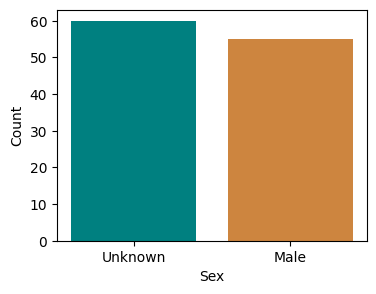

In [ ]:
cantidad = datosVisualizacion['Sex'].value_counts()
colores = ['teal', 'peru']

plt.figure(figsize=(4, 3))
plt.bar(cantidad.index, cantidad.values, color=colores)

plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

Sin embargo, al ver los resultados se evidenció que solo los hombres tienen próstata. Aún así, resulta interesante notar que la cantidad de *Unknown* es mayor que la cantidad de pacientes de lo que se sabe que su sexo es hombre.

#### *Primary Tumor Site*

El sitio primario donde se encuentra el tumor también resultó ser un atributo de interés.

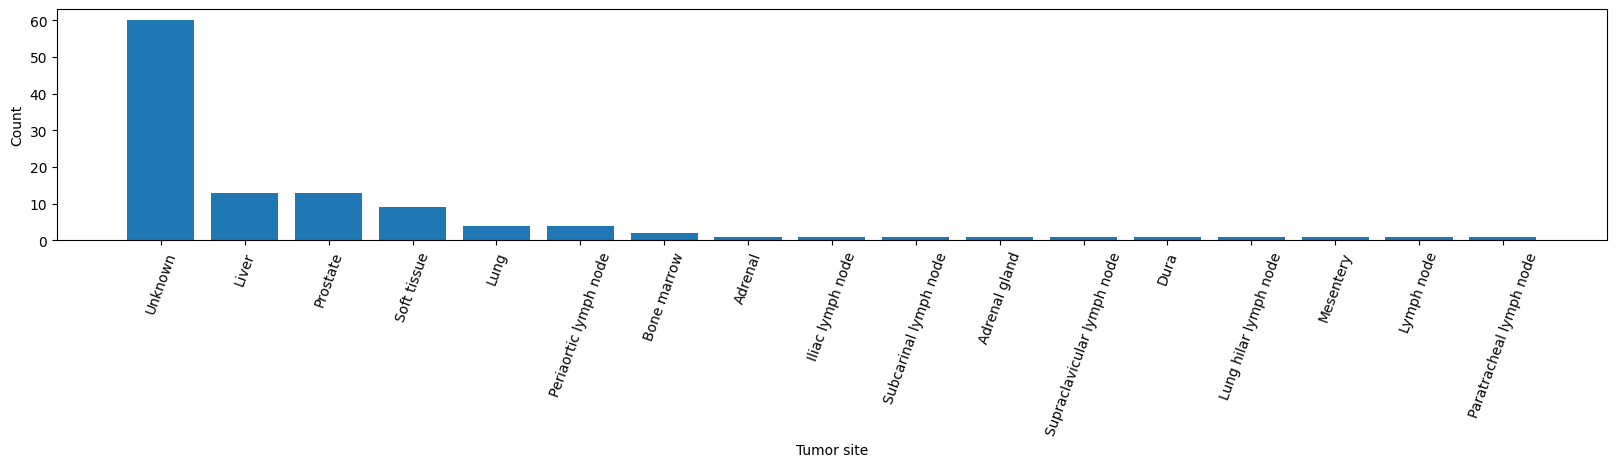

In [ ]:
cantidad = datosVisualizacion['Primary Tumor Site'].value_counts()

plt.figure(figsize=(20, 3))
plt.xticks(rotation=70)
plt.bar(cantidad.index, cantidad.values)

plt.xlabel('Tumor site')
plt.ylabel('Count')

plt.show()

Como se puede observar, de la gran mayoría se desconoce este sitio. En segundo lugar se encuetra el hígado y la próstata. De este gráfico resulta curioso que haya una gran variedad de sitios donde se encuentra el tumor. Además, la próstata no es la que tiene la gran mayoría, a pesar de ser un conjunto de datos de este tipo de cáncer.

#### Tratamientos

A continuación, se decidió visualizar cuáles tratamientos son los más utilizados.

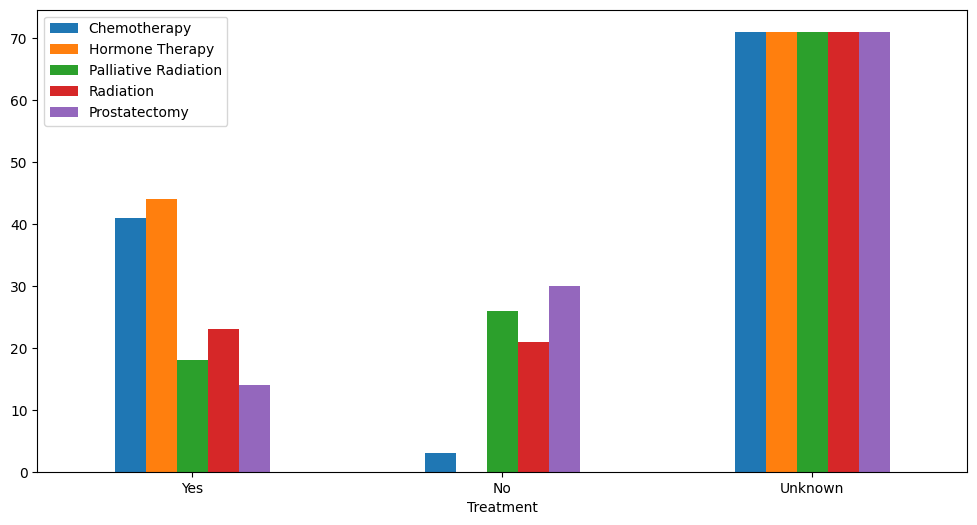

In [ ]:
quimio = datosVisualizacion["Chemotherapy"].value_counts()
hormonas = datosVisualizacion["Hormone Therapy"].value_counts()
paliativo = datosVisualizacion["Palliative Radiation"].value_counts()
prost = datosVisualizacion["Prostatectomy"].value_counts()
radio = datosVisualizacion["Radiation"].value_counts()

valores = pd.DataFrame({
    'Treatment': ['Yes', 'No', 'Unknown'],
    'Chemotherapy': [quimio["Yes"], quimio["No"], quimio["Unknown"]],
    'Hormone Therapy': [hormonas["Yes"], 0, hormonas["Unknown"]],
    'Palliative Radiation': [paliativo["Yes"], paliativo["No"], paliativo["Unknown"]],
    'Radiation': [radio["Yes"], radio["No"], radio["Unknown"]],
    'Prostatectomy': [prost["Yes"], prost["No"], prost["Unknown"]]
})

valores.plot(x="Treatment",
             y=["Chemotherapy", "Hormone Therapy", "Palliative Radiation", "Radiation", "Prostatectomy"],
             kind="bar",
             figsize=(12, 6))

plt.xticks(rotation=0)
plt.show()

De la visualización se logran observar los distintos tratamientos. De ello, se puede resaltar:
1. Como es de esperarse, hay muchos pacientes cuyos tratamientos son desconocidos.
1. Aproximadamente, 40 pacientes fueron tratados con quimioterapia y menos de 5 no.
1. La terapia más utilizada es la de hormonas.
1. Todos los pacientes de los que se les conoce el tratamiento fueron tratados con la terapia de hormonas.
1. Más pacientes no fueron tratados con radiación paliativa que los que sí.
1. Los pacientes tratados con radiación son ligeramente mayores que los que no.
1. La prostectomía no es un tratamiento muy popular. Puesto que se utilizó menos veces de las que sí fue utilizado.

#### *Overall Survival Status*



El estado actual de los pacientes resultó de interés, por lo que se realizó un gráfico de barras para visualizarlo.

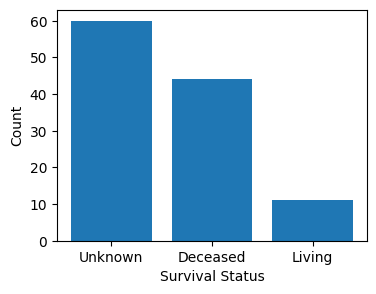

In [ ]:
cantidad = datosVisualizacion['Overall Survival Status'].value_counts()

plt.figure(figsize=(4, 3))
plt.bar(cantidad.index, cantidad.values)

plt.xlabel('Survival Status')
plt.ylabel('Count')

plt.show()

Como se puede observar, se desconoce el estado de la mayoría de pacientes. Sin embargo, de los que sí se conoce el estado, la gran mayoría están muertos. Aproximadamente, 10 pacientes están vivos en comparación con los 45 muertos.

Este es un resultado que es distinto a lo esperado. Se sospecha que la elevada cantidad de muertos puede ser por la dificultad de la privacidad de los datos con los vivos. Sin embargo, también podría indicar que el cáncer de próstata es una enfermedad muy mortal.

### *Boxplots*

#### Supervivencia

Luego de analizar el estado de supervivencia, se decidió explorar el estado con los meses.

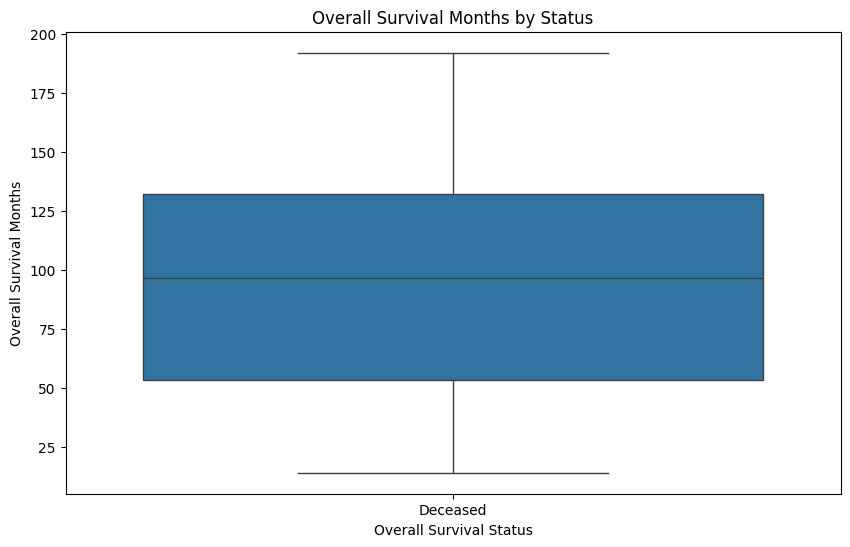

In [ ]:
plt.figure(figsize=(10, 6))

copiaDatosVisualizacion = datosVisualizacion[datosVisualizacion['Overall Survival (Months)'] != 'Unknown']
copiaDatosVisualizacion['Overall Survival (Months)'].astype(int)

sns.boxplot(x='Overall Survival Status', y='Overall Survival (Months)', data=copiaDatosVisualizacion)

plt.title('Overall Survival Months by Status')
plt.xlabel('Overall Survival Status')
plt.ylabel('Overall Survival Months')

plt.show()

Del gráfico se esperaba poder observar si había una relación entre los meses de supervivencia y el estado. Sin embargo, al eliminar los *Unknown* de los meses, también se eliminaron todos los estados de *Living*. Así que no se conoce el *Overall Survival (Months)* de ningún paciente vivo.

También, se puede observar que la mediana de los paciente muertos de los meses de supervivencia es aproximadamente 100. Es decir, 8 años.

### Histogramas



Para ciertas variables numéricas se quiere observar su distribución, como por ejemplo la supervivencia en meses desde su momento de diagnóstico y la edad en el momento del diagnóstico. Se debe notar que ambas no están normalizadas, ya que se tomó más interpretable estos dos datos en esa presentación.


Para esto se van a realizar histogramas trazando la estimación de la densidad de Kernel (KDE).

#### *Overall Survival (Months)*
Ahora, se va a explorar los meses de supervivencia.

<Axes: xlabel='Overall Survival (Months)', ylabel='Count'>

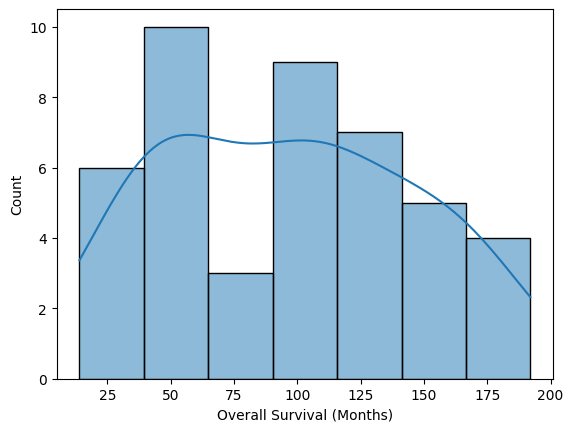

In [ ]:
cantidad = datosVisualizacion[datosVisualizacion['Overall Survival (Months)'] != "Unknown"]['Overall Survival (Months)']
cantidad = cantidad.astype(float)
cantidad.sort_values(inplace=True)
sns.histplot(data = cantidad, kde=True)

Como se puede observar, el valor más popular es 50. Sin embargo, el rango va desde aproximadamente 25 hasta 200. El menor valor es cercano a los 75 meses. No se observa ningún patrón en particular. Sin embargo, se ve una disminución conforme aumentan los meses.

#### *Diagnosis Age*

Similarmente, se decidió explorar la edad de diagnóstico.

<Axes: xlabel='Diagnosis Age', ylabel='Count'>

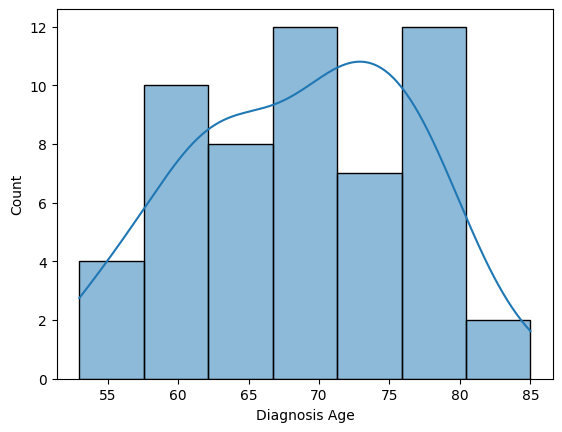

In [ ]:
cantidad = datosVisualizacion[datosVisualizacion['Diagnosis Age'] != "Unknown"]['Diagnosis Age']
cantidad = cantidad.astype(float)
cantidad.sort_values(inplace=True)
sns.histplot(data = cantidad, kde=True)

En el histograma se observa una tendencia de aumento de casos conforme la edad aumenta.

#### *Fraction Genome Altered* y *Mutation Count*

Tanto el *Fraction Genome Altered* y el *Mutation Count* tienen una relación en el genoma. Así que se decidió hacer un histograma de cada uno para comparalos en búsqueda de algún comportamiento similar.

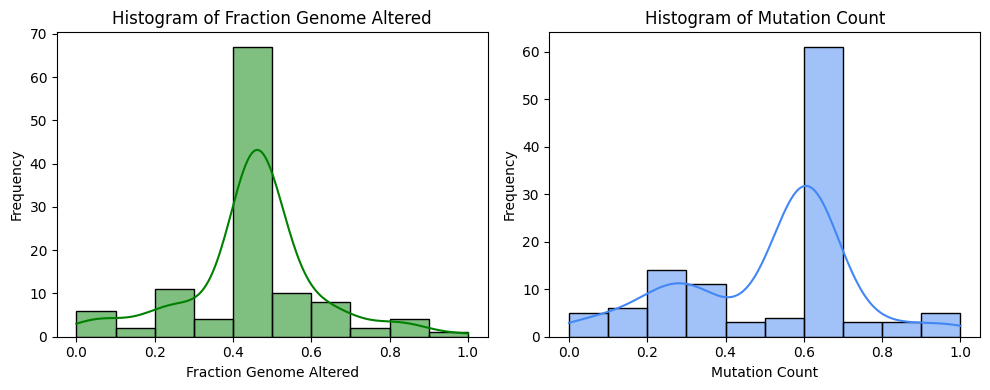

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(C1['Fraction Genome Altered'], bins=10, kde=True, color='green')
plt.title('Histogram of Fraction Genome Altered')
plt.xlabel('Fraction Genome Altered')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(C1['Mutation Count'], bins=10, kde=True, color='#4287f5')
plt.title('Histogram of Mutation Count')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Como se puede observar, el *Fraction Genome Altered* tiene una distribución que parece ser normal al observar la estimación de la densidad. La mayoría de sus datos están en aproximidamente 0.4. Los demás valores son bastante menores.

Por otro lado, el *Mutation count* tiene una distribución de sus valores que no parece ser normal. La mayoría de sus datos se concentran cerca de 0.6. Sin embargo, los valores cercanos a 0.4 y 0.8 son muy bajos. El segundo pico de valores se encuentra cerca de 0.2.

Luego de ver estos dos histogramas, resulta importante explorar ambos juntos por lo que se va a realizar una segunda visualización.

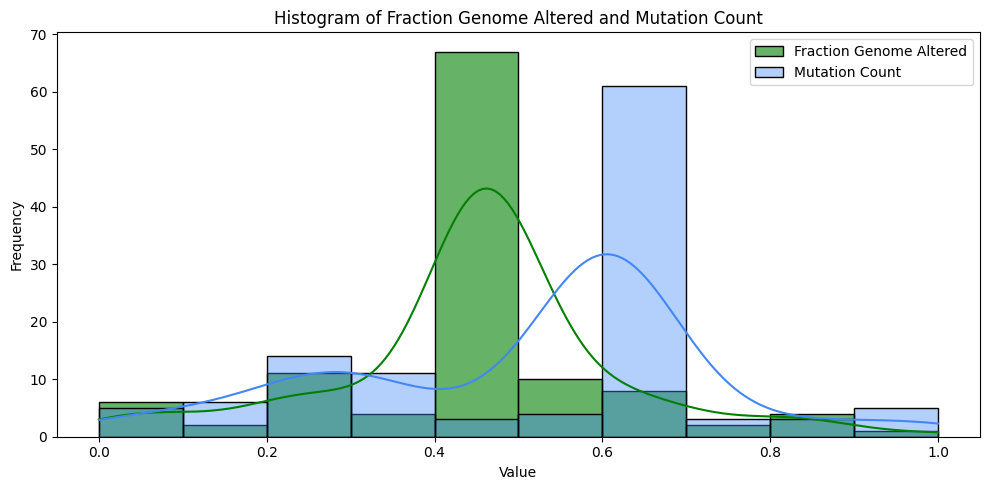

In [ ]:
plt.figure(figsize=(10, 5))

# Plotting both histograms on the same axis
sns.histplot(C1['Fraction Genome Altered'], bins=10, kde=True, color='green', label='Fraction Genome Altered', alpha=0.6)
sns.histplot(C1['Mutation Count'], bins=10, kde=True, color='#4287f5', label='Mutation Count', alpha=0.4)

plt.title('Histogram of Fraction Genome Altered and Mutation Count')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

Al ver ambos histogramas sobrepuestos, se evidencia que el pico de valores de *Fraction Genome Altered* es menos que el de *Mutation Count*. Los valores de *Fraction Genome Altered* comienzan bajos, luego suben y por último bajan a groso modo. Sin embargo, los de *Mutation Count* se mantienen más o menos bajos en todo menos en 0.2, que hay una ligera elevación, y en 0.6, donde hay una gran elevación. Por último, se puede resaltar que el pico de los valores de *Fraction Genome Altered* es mayor que el *Mutation Count*.

### Gráficos interactivos

Se planea aprovechar la interactividad que ofrecen ciertas librerías al realizar un conjunto de gráficos de barras para comparar los diversos tratamientos y ciertos diagramas de dispersión para observar su comportamiento.

##### Conjunto de gráficos de barras interactivo

In [ ]:
# Preparación de los datos
quimio = pd.crosstab(datosVisualizacion['Chemotherapy'], datosVisualizacion['Overall Survival Status'])
radiacion = pd.crosstab(datosVisualizacion['Radiation'], datosVisualizacion['Overall Survival Status'])
protectomia = pd.crosstab(datosVisualizacion['Prostatectomy'], datosVisualizacion['Overall Survival Status'])
hormonas = pd.crosstab(datosVisualizacion['Hormone Therapy'], datosVisualizacion['Overall Survival Status'])
paliativo = pd.crosstab(datosVisualizacion['Palliative Radiation'], datosVisualizacion['Overall Survival Status'])

print(quimio)
print(radiacion)
print(protectomia)
print(hormonas)
print(paliativo)

Overall Survival Status  Deceased  Living  Unknown
Chemotherapy                                      
No                              3       0        0
Unknown                         0      11       60
Yes                            41       0        0
Overall Survival Status  Deceased  Living  Unknown
Radiation                                         
No                             21       0        0
Unknown                         0      11       60
Yes                            23       0        0
Overall Survival Status  Deceased  Living  Unknown
Prostatectomy                                     
No                             30       0        0
Unknown                         0      11       60
Yes                            14       0        0
Overall Survival Status  Deceased  Living  Unknown
Hormone Therapy                                   
Unknown                         0      11       60
Yes                            44       0        0
Overall Survival Status  Deceas

In [ ]:
datosTratamiento = pd.DataFrame({
    'Treatment': ['Chemotherapy', 'Radiation', 'Prostatectomy', 'Hormone Therapy', 'Palliative Radiation', 'Chemotherapy', 'Radiation', 'Prostatectomy', 'Hormone Therapy', 'Palliative Radiation'],
    'Status' : ['Living', 'Living', 'Living', 'Living', 'Living', 'Deceased', 'Deceased', 'Deceased', 'Deceased', 'Deceased'],
    'Count': [0, 0, 0, 0, 0, 41, 23, 14, 44, 18]
})

datosTratamiento

,Treatment,Status,Count
0,Chemotherapy,Living,0
1,Radiation,Living,0
2,Prostatectomy,Living,0
3,Hormone Therapy,Living,0
4,Palliative Radiation,Living,0
5,Chemotherapy,Deceased,41
6,Radiation,Deceased,23
7,Prostatectomy,Deceased,14
8,Hormone Therapy,Deceased,44
9,Palliative Radiation,Deceased,18


In [ ]:
# Aplicación interactiva
app = Dash(__name__)

app.layout = html.Div([
    html.H4('Overall Survival by Treatment'),
    dcc.Dropdown(
        id="dropdown",
        options=["Chemotherapy", "Hormone Therapy", "Palliative Radiation", "Prostatectomy", "Radiation"],
        value="Chemotherapy",
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
def update_bar_chart(treatment):
    df = datosTratamiento
    mask = df["Treatment"] == treatment
    fig = px.bar(df[mask], x="Status", y="Count",
                 color="Status", barmode="group")
    return fig

app.run_server(debug=True)

<IPython.core.display.Javascript object>

Al observar la visualización se puede notar que en los datos no se encuentran entradas de pacientes que hayan pasado por alguna de las cinco terapias (quimioterapia, terapia hormonal, radiación paliativa, radiación y prostatectomía) que hayan vivido.


Por la naturaleza de estos procedimientos y el origen de los datos los resultados no son sorprendentes, en especial para la radiación paliativa.

De igual manera se obtiene información valiosa sobre cómo están distribuidos los datos obtenidos por cada persona que realizó el tratamiento, sin tomar en cuenta los valores desconocidos.

##### Diagramas de dispersión

In [ ]:
output_notebook()

x = C1['Survival from First Hormone Therapy']
y = C1['Survival from First Chemotherapy']
colors = [f"rgb({int(255 * xi / max(x))}, {int(255 * yi / max(y))}, 150)" for xi, yi in zip(x, y)]


TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"

p = figure(tools=TOOLS)

p.circle(x, y, radius=0.025,
         fill_color=colors, fill_alpha=0.6,
         line_color=None)

p.xaxis.axis_label = "Survival from First Hormone Therapy"
p.yaxis.axis_label = "Survival from First Chemotherapy"

show(p)

Al comparar la supervivencia entre la quimioterapia y la terapia hormonal, se esperaba un comportaimiento similar, por lo que se realizó el scatterplot.

En realidad se observa que están distribuidos de una manera un poco cercana, pero no necesariamente muestran indicios de correlación.

Un dato interesante es que cuando la supervivencia de la primera terapia hormonal está en su valor máximo (1 tomando que se trabaja con normalizados), la supervivencia de la primera quimioterapia se encuentra alrededor de un 0.5. Observando lo mismo desde el eje opuesto, cuando la quimioterapia se encuentra en su valor máximo, la terapia hormonal se encuentra alrededor de un 0.5 igualmente.

Este tipo de observación es posible de realizar gracias a las capacidades interactivas de la visualización.


In [ ]:
output_notebook()

x = C1['Radical Prostatectomy Gleason Score for Prostate Cancer']
y = C1['Survival from First Chemotherapy']
colors = [f"rgb({int(255 * xi / max(x))}, {int(255 * yi / max(y))}, 150)" for xi, yi in zip(x, y)]


TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"

p = figure(tools=TOOLS)

p.circle(x, y, radius=0.025,
         fill_color=colors, fill_alpha=0.6,
         line_color=None)

p.xaxis.axis_label = "Radical Prostatectomy Gleason Score for Prostate Cancer"
p.yaxis.axis_label = "Survival from First Chemotherapy"

show(p)

In [ ]:
output_notebook()

x = C1['Radical Prostatectomy Gleason Score for Prostate Cancer']
y = C1['Survival from First Hormone Therapy']
colors = [f"rgb({int(255 * xi / max(x))}, {int(255 * yi / max(y))}, 150)" for xi, yi in zip(x, y)]


TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"

p = figure(tools=TOOLS)

p.circle(x, y, radius=0.025,
         fill_color=colors, fill_alpha=0.6,
         line_color=None)

p.xaxis.axis_label = "Radical Prostatectomy Gleason Score for Prostate Cancer"
p.yaxis.axis_label = "Survival from First Hormone Therapy"

show(p)

Por medio de las últimas visualizaciones, podemos observar cómo el *Radical Prostatectomy Gleason Score for Prostate Cancer* se encuentra concentrado alrededor de un valor específico.


Cuando la supervivencia de la primera terapia de ambos métodos aumenta, el resultado del *Gleason Score* no lo hace. Esto nos da indicios de que no hay correlación entre ambas variables.

Esto será profundizado en la sección posterior.

## 8. Análisis de correlación

### Cálculo de correlaciones

Ahora, se va a analizar la correlación de todas las variables.

La correlación de Pearson se calcula dividiendo entre una multiplicación que contiene desviación estándar de los atributos [12]. Si uno de los dos solo tiene valores iguales, su desviación es 0 y el resultado es NaN por la división entre 0. Por ello, se van a ignorar aquellas que no tienen variación.

In [ ]:
D1 = C1.copy()
D1.drop(D1[D1['Diagnosis Age'] == "Unknown"].index, inplace = True)
D1['Diagnosis Age'] = D1['Diagnosis Age'].astype(int)
D1.drop(D1[D1['Overall Survival (Months)'] == "Unknown"].index, inplace = True)
D1['Overall Survival (Months)'] = D1['Overall Survival (Months)'].astype(int)
D1 = D1.loc[:, D1.apply(pd.Series.nunique) != 1]

In [ ]:
correlacion = D1.corr(method='pearson', numeric_only = False)

In [ ]:
correlacion

,Diagnosis Age,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Serum PSA,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),ETS RAF-SPINK1 Status_(ERG+),ETS RAF-SPINK1 Status_ERG+,ETS RAF-SPINK1 Status_ERG+ (small cell),ETS RAF-SPINK1 Status_ETV1+,ETS RAF-SPINK1 Status_No ETS,ETS RAF-SPINK1 Status_SPINK1+,Matched GE ACGH_No,Matched GE ACGH_Yes,Normal location_Adrenal gland,Normal location_Bone marrow,Normal location_Brain,Normal location_Cerebellum,Normal location_Dura,Normal location_Kidney,Normal location_Liver,Normal location_Lung,Normal location_Pancreas,Normal location_Prostate,Normal location_Soft tissue,Normal location_Spleen,Primary Tumor Site_Adrenal,Primary Tumor Site_Adrenal gland,Primary Tumor Site_Bone marrow,Primary Tumor Site_Dura,Primary Tumor Site_Iliac lymph node,Primary Tumor Site_Liver,Primary Tumor Site_Lung,Primary Tumor Site_Lung hilar lymph node,Primary Tumor Site_Lymph node,Primary Tumor Site_Mesentery,Primary Tumor Site_Paratracheal lymph node,Primary Tumor Site_Periaortic lymph node,Primary Tumor Site_Prostate,Primary Tumor Site_Soft tissue,Primary Tumor Site_Subcarinal lymph node,Primary Tumor Site_Supraclavicular lymph node,Somatic Status_Matched,Somatic Status_Unmatched,Chemotherapy_No,Chemotherapy_Yes,Palliative Radiation_No,Palliative Radiation_Yes,Prostatectomy_No,Prostatectomy_Yes,Radiation_No,Radiation_Yes
Diagnosis Age,1.000000,-0.240115,0.069760,0.381845,-0.201860,0.006289,0.319259,0.074561,0.072873,-0.017887,0.105572,0.119991,-0.093824,-0.052853,0.143736,-0.143736,0.314452,0.006988,-0.115705,0.050911,0.116796,-0.105689,-0.138411,-0.080859,-0.102821,0.072873,0.006988,0.185520,-0.212629,-0.146744,-0.052853,-0.014974,-0.256553,0.158801,0.185268,-0.168706,0.072873,0.006988,-0.190667,0.082801,-0.021427,0.047579,0.160720,-0.278514,-0.143736,0.143736,-0.104472,0.104472,-0.118010,0.118010,-0.087519,0.087519,-0.336278,0.336278
Fraction Genome Altered,-0.240115,1.000000,0.262791,-0.147123,0.213708,-0.036361,-0.073254,0.264476,-0.211695,0.161861,0.265481,-0.083196,-0.110160,-0.229518,-0.120054,0.120054,-0.174277,0.343292,0.059794,-0.185744,0.179822,0.131569,-0.026991,-0.014342,0.223190,-0.211695,0.036182,-0.196675,0.026267,-0.112199,-0.121319,-0.194538,0.085672,0.051076,-0.211386,-0.020549,-0.211695,-0.009600,0.224311,-0.030946,0.259105,0.089988,-0.020032,0.107312,0.120054,-0.120054,0.015649,-0.015649,0.113139,-0.113139,0.318489,-0.318489,0.159673,-0.159673
Mutation Count,0.069760,0.262791,1.000000,-0.079872,0.014718,-0.017791,-0.086923,0.999688,-0.091381,-0.083704,0.256370,0.207680,-0.091420,-0.089738,-0.092877,0.092877,0.030460,-0.077047,0.017948,0.016126,-0.055545,0.221550,-0.188108,0.044795,-0.091381,-0.091381,0.008959,0.085399,0.037627,-0.206055,-0.028203,-0.091381,-0.141551,-0.055602,0.018578,0.309978,-0.091381,0.281309,-0.170219,-0.111465,0.064099,-0.036410,0.281309,0.188137,0.092877,-0.092877,0.007416,-0.007416,0.074951,-0.074951,0.198367,-0.198367,-0.345899,0.345899
Overall Survival (Months),0.381845,-0.147123,-0.079872,1.000000,0.156361,0.471502,0.812854,-0.077532,-0.252536,0.318702,-0.264614,0.131626,-0.085790,-0.092663,0.126036,-0.126036,0.073362,0.110608,-0.074898,-0.001129,0.259590,-0.081444,0.087227,-0.178045,-0.100450,-0.252536,-0.168733,0.106336,-0.112865,-0.156318,0.080550,0.036117,-0.007336,-0.052444,0.177872,-0.171837,-0.252536,0.039221,0.101297,0.208444,0.038357,-0.203289,0.296835,0.026805,-0.126036,0.126036,-0.321320,0.321320,0.133168,-0.133168,-0.517326,0.517326,-0.274712,0.274712
Serum PSA,-0.201860,0.213708,0.014718,0.156361,1.000000,-0.121165,0.065549,0.021074,-0.029278,-0.038127,-0.186506,0.015245,0.159983,-0.035264,-0.246001,0.246001,-0.075955,-0.061720,0.054799,-0.068589,0.216684,0.370657,-0.271575,-0.092507,0.573545,-0.029278,-0.009333,-0.222204,0.217098,-0.094410,-0.113958,-0.074134,0.043468,0.030871,-0.088428,-0.018602,-0.029278,-0.089445,-0.040947,-0.083108,0.088135,0.102313,-0.089279,0.171084,0.246001,-0.246001,-

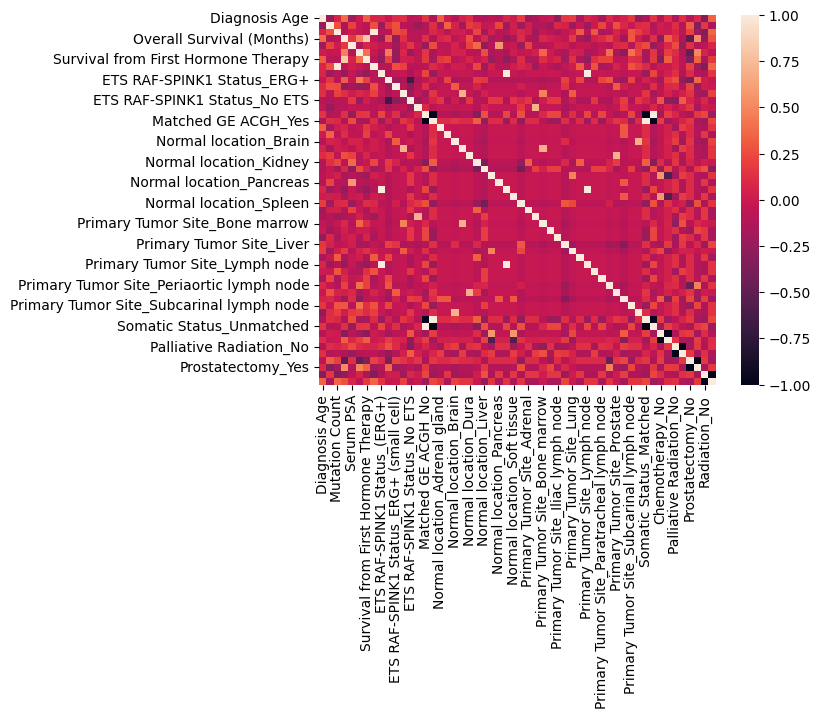

In [ ]:
sns.heatmap(correlacion)
plt.show()

En el mapa de calor se evidencia que hay correlaciones. Sin embargo, también se observa que la mayoría son cercanas a 0. Así que resulta de interés las que tiene correlaciones más fuertes. A continuación, se calcularán aquellas que tienen una correlación mayor a 0.75 o menos a -0.75.

In [ ]:
trianguloSuperior = np.triu(np.ones_like(correlacion, dtype=bool))
correlacionNoNula = correlacion.where(~trianguloSuperior).stack().reset_index()
correlacionNoNula.columns = ['Variable 1', 'Variable 2', 'Correlación']

correlacionFuerte = correlacionNoNula[
    (correlacionNoNula['Correlación'] > 0.75) |
    (correlacionNoNula['Correlación'] < -0.75)
]

correlacionFuerte

,Variable 1,Variable 2,Correlación
18,Survival from First Hormone Therapy,Overall Survival (Months),0.812854
23,TMB (nonsynonymous),Mutation Count,0.999688
119,Matched GE ACGH_Yes,Matched GE ACGH_No,-1.000000
308,Normal location_Prostate,ETS RAF-SPINK1 Status_(ERG+),1.000000
638,Primary Tumor Site_Lymph node,ETS RAF-SPINK1 Status_(ERG+),1.000000
655,Primary Tumor Site_Lymph node,Normal location_Prostate,1.000000
960,Somatic Status_Matched,Matched GE ACGH_No,-1.000000
961,Somatic Status_Matched,Matched GE ACGH_Yes,1.000000
1004,Somatic Status_Unmatched,Matched GE ACGH_No,1.000000
1005,Somatic Status_Unmatched,Matched GE ACGH_Yes,-1.000000


### Análisis de correlaciones de interés

Antes de analizar las correlaciones, es importante recordar que la correlación puede deberse a una causa, una tercera variable o casualidad [12].

#### *Survival from First Hormone Therapy* con *Overall Survival (Months)*

<Axes: xlabel='Survival from First Hormone Therapy', ylabel='Overall Survival (Months)'>

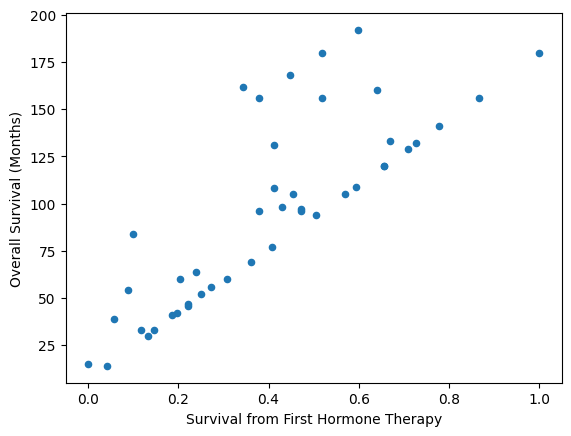

In [ ]:
D1.plot(x='Survival from First Hormone Therapy', y='Overall Survival (Months)', kind='scatter')

Esta correlación tiene un valor de `0.81`. Es una correlación que se puede considerar fuerte. Se puede observar que conforme aumenta el *Overall Survival (Months)* también aumenta la *Survival from First Hormone Therapy*.


#### *TMB (nonsynonymous)* con	*Mutation Count*

<Axes: xlabel='TMB (nonsynonymous)', ylabel='Mutation Count'>

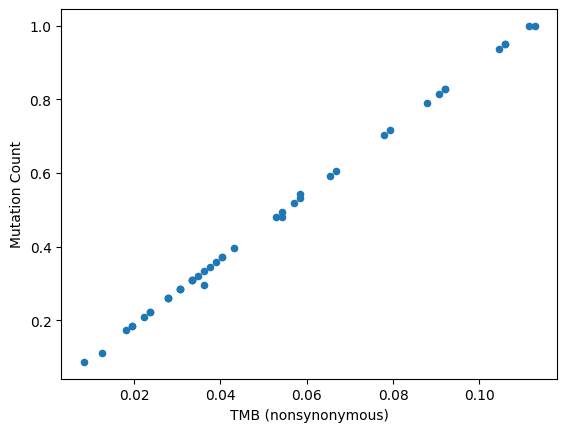

In [ ]:
D1.plot(x='TMB (nonsynonymous)', y='Mutation Count', kind='scatter')

Esta correlación tiene un valor de `0.99`. Es una correlación lineal casi perfecta. Sin embargo, por la naturaleza del problema se sospecha que estas dos variables tienen una correlación alta debido a una tercera variable o casualidad. El TMB alto indica una mejor respuesta clínica, pero la cantidad de mutaciones no necesariamente se relacionan con esto.

#### *Normal location_Prostate* con	*ETS RAF-SPINK1 Status_(ERG+)*

<Axes: xlabel='Normal location_Prostate', ylabel='ETS RAF-SPINK1 Status_(ERG+)'>

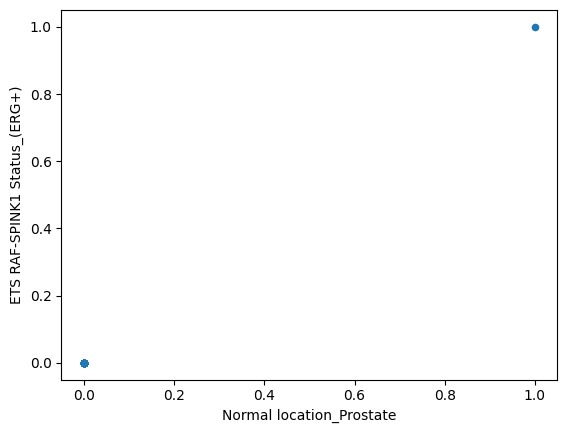

In [ ]:
D1.plot(x='Normal location_Prostate', y='ETS RAF-SPINK1 Status_(ERG+)', kind='scatter')

Esta correlación tiene un valor de `1.0`, lo cual indica una relación lineal perfecta. Como se puede observar, estas dos son variables categóricas, por lo que solo tienen valores de 0 y 1. En ambos casos, coinciden perfectamente. Así que puede haber una relación entre la localización normal en la próstata con la fusión ERG+.

#### *Primary Tumor Site_Lymph Node* con *ETS RAF-SPINK1 Status_(ERG+)*

<Axes: xlabel='Primary Tumor Site_Lymph node', ylabel='ETS RAF-SPINK1 Status_(ERG+)'>

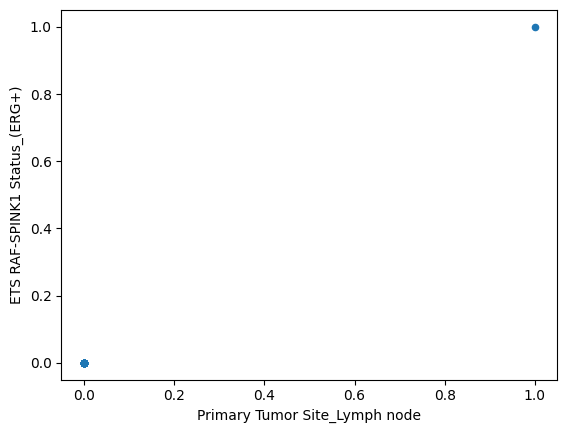

In [ ]:
D1.plot(x='Primary Tumor Site_Lymph node', y='ETS RAF-SPINK1 Status_(ERG+)', kind='scatter')

Esta correlación tiene un valor de `1.0`, lo cual indica una relación lineal perfecta. Como se puede observar, estas dos son variables categóricas, por lo que solo tienen valores de 0 y 1. En ambos casos, coinciden perfectamente. Así que podría ser que haya una causa que provoque tumores en el *Lymph node* provoquen fusiones del tipo ERG+.

#### *Primary Tumor Site_Lymph Node* con *Normal location_Prostate*

<Axes: xlabel='Primary Tumor Site_Lymph node', ylabel='Normal location_Prostate'>

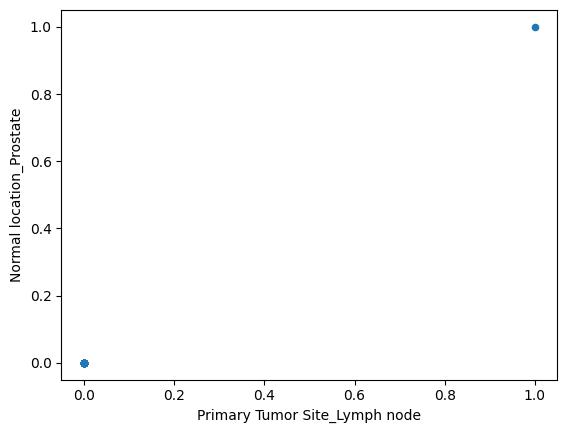

In [ ]:
D1.plot(x='Primary Tumor Site_Lymph node', y='Normal location_Prostate', kind='scatter')

Esta correlación tiene un valor de `1.0`, lo cual indica una relación lineal perfecta. Como se puede observar, estas dos son variables categóricas, por lo que solo tienen valores de 0 y 1. En ambos casos, coinciden perfectamente. Anteriormente, se vio que estas dos variables se relacionaban con las fusiones en el genoma de tipo ERG+, por lo que se puede sospechar que las tres variables tienen una causa en común o entre ellas se afectan.

#### *Somatic Status* con *Matched GE ACGH*

<Axes: xlabel='Somatic Status_Matched', ylabel='Matched GE ACGH_No'>

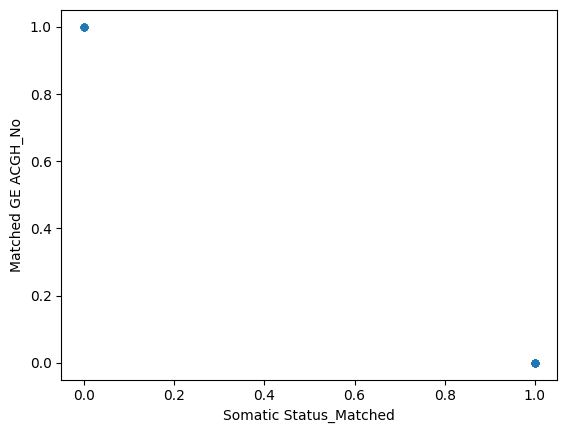

In [ ]:
D1.plot(x='Somatic Status_Matched', y='Matched GE ACGH_No', kind='scatter')

<Axes: xlabel='Somatic Status_Matched', ylabel='Matched GE ACGH_Yes'>

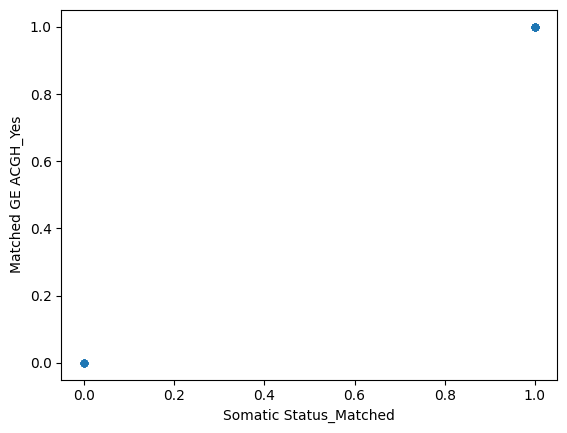

In [ ]:
D1.plot(x='Somatic Status_Matched', y='Matched GE ACGH_Yes', kind='scatter')

<Axes: xlabel='Somatic Status_Unmatched', ylabel='Matched GE ACGH_No'>

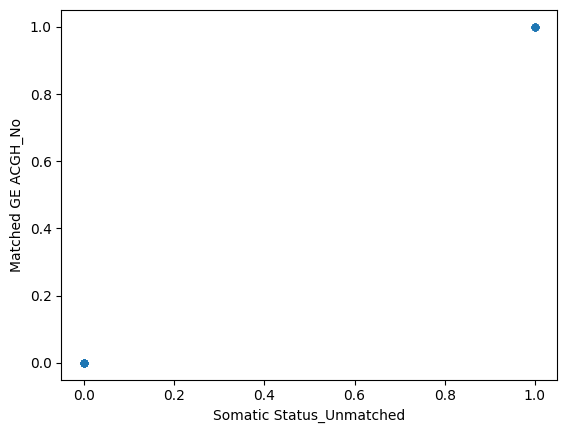

In [ ]:
D1.plot(x='Somatic Status_Unmatched', y='Matched GE ACGH_No', kind='scatter')

<Axes: xlabel='Somatic Status_Unmatched', ylabel='Matched GE ACGH_Yes'>

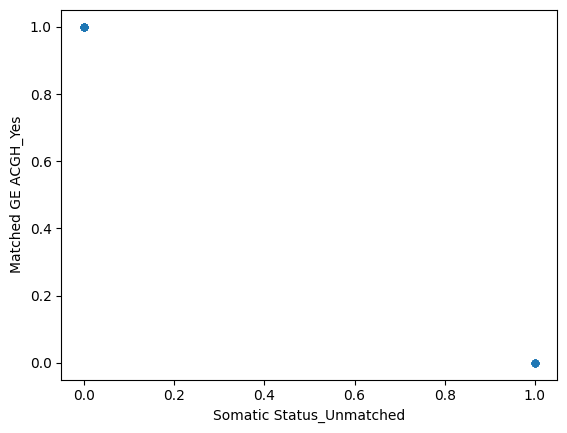

In [ ]:
D1.plot(x='Somatic Status_Unmatched', y='Matched GE ACGH_Yes', kind='scatter')

Estos atributos tienen correlaciones de `1.0` o de `-1.0`. En ambos casos, lo que nos indican es que tienen una correlación lineal perfecta, ya sea positiva o negativa. Al ser variables categóricas, se separaron en distintas columnas para su codificación. Sin embargo, queda claro que cuando el *Somatic Status* es *Matched* no hay *Matched GE ACGH* y cuando es *Unmatched* hay *Matched GE ACGH*. Este comportamiento fue detectado por 4 correlaciones distintas, pero al final representan lo mismo.

## 9. Análisis de polars y pandas

La librería *polars* se caracteriza porque fue diseñada con el rendimiento en mente, por lo que permite que sea más **rápida**. Utiliza distintos hilos de ejecución para lograr paralelismo [13].

In [ ]:
import polars as pl

### Cargar conjunto de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Lectura de datos desde Google Drive
!ls "/content/drive/My Drive/Colab Notebooks/prad_mich_clinical_data.tsv"
originalPolars = pl.read_csv('/content/drive/My Drive/Colab Notebooks/prad_mich_clinical_data.tsv', separator='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/Colab Notebooks/prad_mich_clinical_data.tsv'


In [ ]:
# Lectura de datos desde GitHub
originalPolars = pl.read_csv("https://raw.githubusercontent.com/AngieS23/lab_1_ML/main/prad_mich_clinical_data.tsv", separator='\t')

In [ ]:
# Se deben realizar las mismas manipulaciones de los datos que con pandas para una comparación justa
originalPolars = originalPolars.drop(['Study ID', 'Patient ID', 'Sample ID', 'Oncotree Code', 'Cancer Type', 'Cancer Type Detailed'])

originalPolars = originalPolars.with_columns(pl.col('Overall Survival Status').str.replace("0:LIVING", "Living"))
originalPolars = originalPolars.with_columns(pl.col('Overall Survival Status').str.replace("1:DECEASED", "Deceased"))

### Exploración inicial

In [ ]:
originalPolars.head()

Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str
"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",1,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA"""
"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",1,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA"""
"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",1,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA"""
"""62.0""","""ERG+""","""0.1277""","""8""","""Yes""","""23""","""Prostate""","""NA""","""Living""","""Prostate""",1,"""Primary""","""5.3""","""Male""","""Matched""","""NA""","""NA""","""0.766666666667…","""NA""","""NA""","""NA""","""NA""","""NA"""
"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",1,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA"""


In [ ]:
originalPolars.tail()

Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str
"""76.0""","""No ETS""","""0.1104""","""NA""","""No""","""34""","""Spleen""","""141.0""","""Deceased""","""Lung""",1,"""Metastasis""","""82.0""","""Male""","""Unmatched""","""39.0""","""141.0""","""1.13333333333""","""Yes""","""Yes""","""Yes""","""No""","""No"""
"""59.0""","""No ETS""","""0.5352""","""NA""","""No""","""31""","""Liver""","""94.0""","""Deceased""","""Iliac lymph no…",1,"""Metastasis""","""1678.0""","""Male""","""Unmatched""","""12.0""","""94.0""","""1.03333333333""","""Yes""","""Yes""","""Yes""","""No""","""No"""
"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""",1,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA"""
"""62.0""","""ERG+""","""0.6960""","""NA""","""No""","""27""","""Liver""","""129.0""","""Deceased""","""Paratracheal l…",1,"""Metastasis""","""658.0""","""Male""","""Unmatched""","""32.0""","""129.0""","""0.9""","""Yes""","""Yes""","""No""","""No""","""No"""
"""66.0""","""No ETS""","""0.6947""","""NA""","""Yes""","""38""","""Pancreas""","""64.0""","""Deceased""","""Soft tissue""",1,"""Metastasis""","""8083.0""","""Male""","""Matched""","""19.0""","""48.0""","""1.26666666667""","""Yes""","""Yes""","""No""","""No""","""No"""


Como se puede observar, hay muchos valores nulos.

Sin embargo, lo que más llama la atención en comparación con *pandas* es que todos los atributos que tienen valores NA se interpretan como tipo de dato `str`. Es decir, no fue leído como valor nulo, como lo hizo *pandas*.

In [ ]:
originalPolars.describe()

describe,Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""121""","""121""","""121""","""121""","""121""","""121""","""121""","""121""","""121""","""121""",121.0,"""121""","""121""","""121""","""121""","""121""","""121""","""121""","""121""","""121""","""121""","""121""","""121"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,1.049587,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,0.312283,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""52.0""","""(ERG+)""","""0.0153""","""7""","""NA""","""13""","""Adrenal gland""","""105.0""","""Deceased""","""Adrenal""",1.0,"""Metastasis""","""0.0""","""Male""","""Matched""","""0.0""","""105.0""","""0.466666666667…","""NA""","""NA""","""NA""","""NA""","""NA"""
"""25%""",null,null,null,null,null,null,null,null,null,null,1.0,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null,null,1.0,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null,null,1.0,null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""NA""","""SPINK1+""","""NA""","""NA""","""Yes""","""NA""","""Spleen""","""NA""","""NA""","""Supraclavicula…",3.0,"""Primary""","""NA""","""NA""","""Unmatched""","""NA""","""NA""","""NA""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes"""


Otra cosa en la que se diferencia es que el `describe` brinda más información en *polars*. Aquí se puede observar el tipo de dato e intenta calcular las estadísticas para todos los atributos, no solo los numéricos.

Cabe resaltar que en este momento indica que no hay nulos porque los está interpretando como una hilera "NA".

### Manejo de valores nulos

Primero, se va a realizar lo mismo que se realizó con *pandas* para manejar los valores nulos de los categóricos.

In [ ]:
# Cambiar los "NA" por NaN
originalPolars = originalPolars.with_columns([
    pl.col(column).map_elements(lambda x: None if x == "NA" else x) for column in originalPolars.columns
])

# Categoría de Unknown
originalPolars = originalPolars.with_columns([
    pl.col(col).fill_null('Unknown') for col in atributosCategoricos
])

originalPolars = originalPolars.with_columns([
    pl.col('Diagnosis Age').fill_null('Unknown'),
    pl.col('Overall Survival (Months)').fill_null('Unknown')
])

In [ ]:
# Cambiar el tipo de dato
originalPolars = originalPolars.with_columns(pl.col('Fraction Genome Altered').cast(pl.Float32, strict=True).alias('Fraction Genome Altered'))

originalPolars = originalPolars.with_columns(pl.col('Radical Prostatectomy Gleason Score for Prostate Cancer').cast(pl.Int32, strict=True).
                                             alias('Radical Prostatectomy Gleason Score for Prostate Cancer'))

originalPolars = originalPolars.with_columns(pl.col('Mutation Count').cast(pl.Int32, strict=True).alias('Mutation Count'))

originalPolars = originalPolars.with_columns(pl.col('Serum PSA').cast(pl.Float32, strict=True).alias('Serum PSA'))

originalPolars = originalPolars.with_columns(pl.col('Survival from First Chemotherapy').cast(pl.Float32, strict=True).alias('Survival from First Chemotherapy'))
originalPolars = originalPolars.with_columns(pl.col('Survival from First Chemotherapy').cast(pl.Int32, strict=True).alias('Survival from First Chemotherapy'))

originalPolars = originalPolars.with_columns(pl.col('Survival from First Hormone Therapy').cast(pl.Float32, strict=True).alias('Survival from First Hormone Therapy'))
originalPolars = originalPolars.with_columns(pl.col('Survival from First Hormone Therapy').cast(pl.Int32, strict=True).alias('Survival from First Hormone Therapy'))

originalPolars = originalPolars.with_columns(pl.col('TMB (nonsynonymous)').cast(pl.Float32, strict=True).alias('TMB (nonsynonymous)'))

In [ ]:
originalPolars.head()

Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
str,str,f32,i32,str,i32,str,str,str,str,i64,str,f32,str,str,i32,i32,f32,str,str,str,str,str
"""Unknown""","""Unknown""",null,null,"""Unknown""",null,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1,"""Unknown""",null,"""Unknown""","""Unknown""",null,null,null,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",null,null,"""Unknown""",null,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1,"""Unknown""",null,"""Unknown""","""Unknown""",null,null,null,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",null,null,"""Unknown""",null,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1,"""Unknown""",null,"""Unknown""","""Unknown""",null,null,null,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""62.0""","""ERG+""",0.1277,8,"""Yes""",23,"""Prostate""","""Unknown""","""Living""","""Prostate""",1,"""Primary""",5.3,"""Male""","""Matched""",null,null,0.766667,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",null,null,"""Unknown""",null,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1,"""Unknown""",null,"""Unknown""","""Unknown""",null,null,null,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""


Ahora, se van a aplicar las mismas 3 técnicas para manejo de valores nulos numéricos.

#### Técnica #1 - Calcular media del atributo faltante

In [ ]:
tiempoInicialAp1 = datetime.datetime.now()

Ap1 = originalPolars.clone()

for i in atributosNumericos:
  Ap1 = Ap1.with_columns(pl.col(i).fill_null(pl.mean(i)),)

tiempoAp1 = datetime.datetime.now() - tiempoInicialAp1
tiempoAp1.total_seconds()

0.005241

In [ ]:
Ap1.head()

Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
str,str,f32,f64,str,f64,str,str,str,str,f64,str,f32,str,str,f64,f64,f32,str,str,str,str,str
"""Unknown""","""Unknown""",0.388449,8.272727,"""Unknown""",62.278689,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1.0,"""Unknown""",927.63446,"""Unknown""","""Unknown""",36.591837,75.3,2.080874,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",0.388449,8.272727,"""Unknown""",62.278689,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1.0,"""Unknown""",927.63446,"""Unknown""","""Unknown""",36.591837,75.3,2.080874,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",0.388449,8.272727,"""Unknown""",62.278689,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1.0,"""Unknown""",927.63446,"""Unknown""","""Unknown""",36.591837,75.3,2.080874,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""62.0""","""ERG+""",0.1277,8.0,"""Yes""",23.0,"""Prostate""","""Unknown""","""Living""","""Prostate""",1.0,"""Primary""",5.3,"""Male""","""Matched""",36.591837,75.3,0.766667,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",0.388449,8.272727,"""Unknown""",62.278689,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1.0,"""Unknown""",927.63446,"""Unknown""","""Unknown""",36.591837,75.3,2.080874,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""


Al utilizar *pandas* esta misma técnica tomó `0.009071` segundos. En cambio, al utilizar *polars* se tardó `0.003183` segundos. Así que *polars* logró el mismo objetivo que *pandas* pero en un tercio del tiempo.

#### Técnica #2 - Eliminación de atributos

In [ ]:
tiempoInicialAp2 = datetime.datetime.now()

Ap2 = originalPolars.clone()

cantNull = Ap2.null_count()
columnasConNull = [col for col in cantNull.columns if cantNull.select(pl.col(col)).item() > 0]

Ap2 = Ap2.drop(columnasConNull)

tiempoAp2 = datetime.datetime.now() - tiempoInicialAp2
tiempoAp2.total_seconds()

0.00467

Al utilizar *pandas* esta misma técnica tomó `0.003743` segundos. En cambio, al utilizar *polars* se tardó `0.002124` segundos. En este caso la diferencia en rendimiento no fue tan grande como en la técnica anterior. Esto se puede deber a que borrar un atributo por tener valores nulos es mucho menos caro computacionalmente hablando que tener que calcular la mediana de cada atributo y reemplazarlo donde corresponde.

In [ ]:
Ap2.head()

Diagnosis Age,ETS RAF-SPINK1 Status,Matched GE ACGH,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str
"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""",1,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""",1,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""",1,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""62.0""","""ERG+""","""Yes""","""Prostate""","""Unknown""","""Living""","""Prostate""",1,"""Primary""","""Male""","""Matched""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""",1,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""


#### Técnica #3 - Calcular mediana del atributo faltante

In [ ]:
tiempoInicialAp3 = datetime.datetime.now()

Ap3 = originalPolars.clone()

for i in atributosNumericos:
  Ap3 = Ap3.with_columns(pl.col(i).fill_null(pl.median(i)),)

tiempoAp3 = datetime.datetime.now() - tiempoInicialAp3
tiempoAp3.total_seconds()

0.006711

In [ ]:
Ap3.head()

Diagnosis Age,ETS RAF-SPINK1 Status,Fraction Genome Altered,Radical Prostatectomy Gleason Score for Prostate Cancer,Matched GE ACGH,Mutation Count,Normal location,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Number of Samples Per Patient,Sample Type,Serum PSA,Sex,Somatic Status,Survival from First Chemotherapy,Survival from First Hormone Therapy,TMB (nonsynonymous),Chemotherapy,Hormone Therapy,Palliative Radiation,Prostatectomy,Radiation
str,str,f32,f64,str,f64,str,str,str,str,f64,str,f32,str,str,f64,f64,f32,str,str,str,str,str
"""Unknown""","""Unknown""",0.422,8.0,"""Unknown""",40.0,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1.0,"""Unknown""",250.5,"""Unknown""","""Unknown""",30.0,74.5,1.333333,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",0.422,8.0,"""Unknown""",40.0,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1.0,"""Unknown""",250.5,"""Unknown""","""Unknown""",30.0,74.5,1.333333,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",0.422,8.0,"""Unknown""",40.0,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1.0,"""Unknown""",250.5,"""Unknown""","""Unknown""",30.0,74.5,1.333333,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""62.0""","""ERG+""",0.1277,8.0,"""Yes""",23.0,"""Prostate""","""Unknown""","""Living""","""Prostate""",1.0,"""Primary""",5.3,"""Male""","""Matched""",30.0,74.5,0.766667,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""
"""Unknown""","""Unknown""",0.422,8.0,"""Unknown""",40.0,"""Unknown""","""Unknown""","""Unknown""","""Unknown""",1.0,"""Unknown""",250.5,"""Unknown""","""Unknown""",30.0,74.5,1.333333,"""Unknown""","""Unknown""","""Unknown""","""Unknown""","""Unknown"""


Al utilizar *pandas* esta misma técnica tomó `0.013959` segundos. En cambio, al utilizar *polars* se tardó `0.009132` segundos. En este caso la diferencia tampoco fue tan marcada, pero sí se muestra que *polars* es más rápido.

Este es un dataset pequeño. Consta de 121 filas y 22 columnas. Si bien tiene muchos valores nulos, sigue siendo pequeño. Así que en este caso no se puede apreciar el potencial completo de *pandas* pero definitivamente se evidencia que es mucho más rápido.

En términos de facilidad de uso, [13] establece que es fácil de utilizar. Sin embargo, a nosotros no nos pareció fácil por dos razones principales:
1. Su sintaxis parece ser una mezcla entre `SQL`, `Python` y `Rust` (lenguaje en el que está escrito *polars*). Así aplicarla no es tan sencillo como *pandas*.
1. Parece ser menos utilizado que *pandas*, por lo que hay menos foros de ayuda para ciertos problemas. Esto provoca que su uso se más complicado.

En conclusión, *polars* en rendimiento es mejor que *pandas*. Para un conjunto de datos grande, no hay duda la opción es *polars*. Sin embargo, para un conjunto de datos pequeño, como este, el rendimiento no tiene un peso tan grande. Ninguna de las dos librerías tarda ni una décima de segundo. Así que, por facilidad de uso, para conjuntos de datos pequeños, la opción que preferimos es *pandas*.

## Bibliografía


[1] “CBioPortal for Cancer Genomics.” https://www.cbioportal.org/study/clinicalData?id=prad_mich

[2] N. Palanisamy et al., “Molecular profiling of ETS gene rearrangements in patients with prostate cancer registered in REDEEM clinical trial1Share senior authorship.,” Urologic Oncology Seminars and Original Investigations, vol. 33, no. 3, p. 108.e5-108.e13, Mar. 2015, doi: 10.1016/j.urolonc.2014.07.015.

[3] J. Zhou et al., “Analysis of tumor genomic pathway alterations using Broad-Panel Next-Generation sequencing in surgically resected lung adenocarcinoma,” Clinical Cancer Research, vol. 25, no. 24, pp. 7475–7484, Dec. 2019, doi: 10.1158/1078-0432.ccr-19-1651.

[4] W. Bai, Y. Fadil, O. Idrissi, M. Dakir, A. Debbagh, and R. Abouteib, “The correlation between the gleason score of the biopsy and that of the prostatectomy patch,” Annals of Medicine and Surgery, vol. 63, Mar. 2021, doi: 10.1016/j.amsu.2021.02.015.

[5] “Gleason Score,” National Library of Medicine, 2021. https://www.ncbi.nlm.nih.gov/books/NBK553178/

[6] M. G. Butler, W. Fischer, N. Kibiryeva, and D. C. Bittel, “Array comparative genomic hybridization (aCGH) analysis in Prader–Willi syndrome,” American Journal of Medical Genetics Part A, vol. 146A, no. 7, pp. 854–860, Feb. 2008, doi: 10.1002/ajmg.a.32249.

[7] “Prostate-Specific antigen (PSA) test.” https://medlineplus.gov/lab-tests/prostate-specific-antigen-psa-test/

[8] D. Sha, Z. Jin, J. Budczies, K. Kluck, A. Stenzinger, and F. A. Sinicrope, “Tumor mutational burden as a predictive biomarker in solid tumors,” Cancer Discovery, vol. 10, no. 12, pp. 1808–1825, Dec. 2020, doi: 10.1158/2159-8290.cd-20-0522.

[9] U. Rönningås, P. Fransson, M. Holm, and A. Wennman-Larsen, “Prostate-specific antigen (PSA) and distress: - a cross-sectional nationwide survey in men with prostate cancer in Sweden,” BMC Urology, vol. 19, no. 1, Jul. 2019, doi: 10.1186/s12894-019-0493-1.

[10] F. M. Adam, “Visualizing data in Python: ‘Comparing Matplotlib, Seaborn, Plotly, and Bokeh,’” Medium, Mar. 15, 2023. [Online]. Available: https://medium.com/@vafaisalm93/visualizing-data-in-python-comparing-matplotlib-seaborn-plotly-and-bokeh-a53d382be09b

[11] S. Taylor-Morgan, “The 7 most popular ways to plot data in Python,” Opensource.com. https://opensource.com/article/20/4/plot-data-python

[12] L. Kulcsar, “Correlation: What is it? How to calculate it? .corr() in pandas,” Data36, Oct. 03, 2022. https://data36.com/correlation-definition-calculation-corr-pandas/

[13] “Polars.” https://pola.rs/